# Draft

To analise the dataset we need to have a context. Let's define the goal: research lifts failures in the age classes.
Based on that we can design the essential rules: 
1. Data cleaning can be limited to age and lifts related columns
2. AgeClass is more inportant than the Age column
3. Checking correctness of the score metrics can be omitted
4. Final dataset can be limited to personal columns, lifts and some additional features like Equipent, Division, Event
5. Visualization will contain lifts failures in the age classes. The sex, equipment, division and even event will be taken into account

Database source: https://www.kaggle.com/open-powerlifting/powerlifting-database

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [2]:
df = pd.read_csv('Data/openpowerlifting.csv', low_memory=False)
# init_df = df.copy() # can be used for attempts failure statistics where AgeClass is not taken into account

In [3]:
df.shape

(1423354, 37)

In [4]:
df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,IPFPoints
count,757527.000000,1.406622e+06,337580.000000,333349.000000,323842.000000,3696.000000,1.031450e+06,499779.000000,493486.000000,478485.000000,...,363544.000000,356023.000000,339947.000000,9246.000000,1.081808e+06,1.313184e+06,1.304407e+06,1.304254e+06,1.304407e+06,1.273286e+06
mean,31.501570,8.422503e+01,114.102442,92.155846,30.056842,71.356870,1.740049e+02,83.892373,55.065745,-18.520481,...,162.700840,130.228378,12.995484,78.914945,1.872585e+02,3.956148e+02,2.882247e+02,2.960682e+02,2.718484e+02,4.854330e+02
std,13.371707,2.322011e+01,147.143021,173.701524,200.413385,194.522045,6.923931e+01,105.196350,130.302229,144.225726,...,108.681438,162.680134,215.052488,192.605159,6.232821e+01,2.011420e+02,1.231805e+02,1.249700e+02,1.175571e+02,1.133489e+02
min,0.000000,1.510000e+01,-555.000000,-580.000000,-600.500000,-550.000000,-4.775000e+02,-480.000000,-507.500000,-575.000000,...,-461.000000,-470.000000,-587.500000,-461.000000,-4.100000e+02,2.500000e+00,1.470000e+00,1.470000e+00,1.410000e+00,2.160000e+00
25%,21.000000,6.670000e+01,90.000000,68.000000,-167.500000,-107.840000,1.224700e+02,57.500000,-52.500000,-140.000000,...,125.000000,115.000000,-210.000000,-110.000000,1.383500e+02,2.325000e+02,1.979000e+02,2.048200e+02,1.828100e+02,4.028600e+02
50%,28.000000,8.180000e+01,147.500000,145.000000,110.000000,135.000000,1.678300e+02,105.000000,95.000000,-60.000000,...,180.000000,177.500000,117.500000,145.150000,1.850000e+02,3.787500e+02,3.052000e+02,3.120300e+02,2.859400e+02,4.780500e+02
75%,40.000000,9.915000e+01,200.000000,205.000000,192.500000,205.000000,2.175000e+02,145.000000,145.000000,117.500000,...,226.800000,230.000000,205.000000,210.000000,2.300000e+02,5.400000e+02,3.745600e+02,3.837600e+02,3.552800e+02,5.597000e+02
max,97.000000,2.580000e+02,555.000000,566.990000,560.000000,505.500000,5.750000e+02,467.500000,487.500000,478.540000,...,450.000000,460.400000,457.500000,418.000000,5.850000e+02,1.367500e+03,7.793800e+02,8.044000e+02,7.429600e+02,1.245930e+03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423354 entries, 0 to 1423353
Data columns (total 37 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1423354 non-null  object 
 1   Sex              1423354 non-null  object 
 2   Event            1423354 non-null  object 
 3   Equipment        1423354 non-null  object 
 4   Age              757527 non-null   float64
 5   AgeClass         786800 non-null   object 
 6   Division         1415176 non-null  object 
 7   BodyweightKg     1406622 non-null  float64
 8   WeightClassKg    1410042 non-null  object 
 9   Squat1Kg         337580 non-null   float64
 10  Squat2Kg         333349 non-null   float64
 11  Squat3Kg         323842 non-null   float64
 12  Squat4Kg         3696 non-null     float64
 13  Best3SquatKg     1031450 non-null  float64
 14  Bench1Kg         499779 non-null   float64
 15  Bench2Kg         493486 non-null   float64
 16  Bench3Kg         4

In [6]:
# check which columns contain nan values
df.isna().any()

Name               False
Sex                False
Event              False
Equipment          False
Age                 True
AgeClass            True
Division            True
BodyweightKg        True
WeightClassKg       True
Squat1Kg            True
Squat2Kg            True
Squat3Kg            True
Squat4Kg            True
Best3SquatKg        True
Bench1Kg            True
Bench2Kg            True
Bench3Kg            True
Bench4Kg            True
Best3BenchKg        True
Deadlift1Kg         True
Deadlift2Kg         True
Deadlift3Kg         True
Deadlift4Kg         True
Best3DeadliftKg     True
TotalKg             True
Place              False
Wilks               True
McCulloch           True
Glossbrenner        True
IPFPoints           True
Tested              True
Country             True
Federation         False
Date               False
MeetCountry        False
MeetState           True
MeetName           False
dtype: bool

In [7]:
# how many
df.isna().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
Age                 665827
AgeClass            636554
Division              8178
BodyweightKg         16732
WeightClassKg        13312
Squat1Kg           1085774
Squat2Kg           1090005
Squat3Kg           1099512
Squat4Kg           1419658
Best3SquatKg        391904
Bench1Kg            923575
Bench2Kg            929868
Bench3Kg            944869
Bench4Kg           1413849
Best3BenchKg        147173
Deadlift1Kg        1059810
Deadlift2Kg        1067331
Deadlift3Kg        1083407
Deadlift4Kg        1414108
Best3DeadliftKg     341546
TotalKg             110170
Place                    0
Wilks               118947
McCulloch           119100
Glossbrenner        118947
IPFPoints           150068
Tested              329462
Country            1034470
Federation               0
Date                     0
MeetCountry              0
MeetState           481809
MeetName                 0
d

In [8]:
# let's go throught the columns with nan values
# the missing values for all lifts, TotalKg, Wilks, McCulloch, Glossbrenner, IPFPoints can be nan e.g. when competitor failed all lifts
# Age and AgeClass could be really informative. For any Age related statistics rows with nan for both have to be deleted
# Age and AgeClass can complement each other

In [9]:
df[df[['Age', 'AgeClass']].isna().all(axis=1) == True]

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
106,Tim Plummer,M,SBD,Wraps,NaN,NaN,M-OR,109.50,110,145.0,...,279.93,268.20,377.35,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
640,Mike Read,M,SBD,Wraps,NaN,NaN,M-OR,120.90,125,190.0,...,308.49,294.31,412.69,NaN,NaN,GPC-AUS,2013-04-28,Australia,VIC,Victoria Qualifier
641,Mike V,M,SBD,Wraps,NaN,NaN,M-OR,132.50,140,100.0,...,NaN,NaN,NaN,NaN,NaN,GPC-AUS,2013-04-28,Australia,VIC,Victoria Qualifier
908,Alexandra Hegman,F,SBD,Wraps,NaN,NaN,F-OR,63.20,67.5,100.0,...,345.52,305.09,556.19,NaN,NaN,GPC-AUS,2017-09-09,Australia,VIC,Melbourne Cup
2073,Daniel Kindilas,M,SBD,Wraps,NaN,NaN,M-OR,109.05,110,NaN,...,NaN,NaN,NaN,NaN,NaN,GPC-AUS,2017-10-22,Australia,NSW,Sydney Cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423251,Michał Kowalczyk,M,SBD,Raw,NaN,NaN,Juniors Under 16,79.20,83,155.0,...,307.47,297.07,438.12,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423253,Norbert Kaczor,M,SBD,Raw,NaN,NaN,Juniors Under 16,84.40,93,130.0,...,262.75,253.55,362.06,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423254,Daniel Machulik,M,SBD,Raw,NaN,NaN,Juniors Under 16,83.30,93,100.0,...,246.45,237.88,334.43,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423255,Jakub Ostrowski,M,SBD,Raw,NaN,NaN,Juniors Under 16,73.00,74,100.0,...,243.33,235.52,327.50,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup


In [10]:
df[['Age', 'AgeClass']].isna().all(axis=1).sum()

636380

In [11]:
ageclass = df['AgeClass'].unique()
print(len(ageclass)) 
for ac in ageclass:
    print(ac)

17
24-34
40-44
20-23
45-49
35-39
18-19
50-54
16-17
80-999
70-74
nan
65-69
13-15
60-64
55-59
75-79
5-12


In [12]:
df_age_class = df[['Age', 'AgeClass']][df['AgeClass'].isna() == True]

In [13]:
df_age_class[df_age_class['Age'].isna() == False]

,Age,AgeClass
29696,3.5,NaN
68216,3.5,NaN
68396,0.5,NaN
71206,1.5,NaN
72420,0.5,NaN
...,...,...
1317461,3.5,NaN
1352701,1.5,NaN
1352712,3.0,NaN
1376438,1.5,NaN


In [14]:
df.iloc[1317461]

Name               Jean Sebastien
Sex                             M
Event                         SBD
Equipment              Single-ply
Age                           3.5
AgeClass                      NaN
Division                     Open
BodyweightKg                 67.5
WeightClassKg                67.5
Squat1Kg                      NaN
Squat2Kg                      NaN
Squat3Kg                      NaN
Squat4Kg                      NaN
Best3SquatKg                175.0
Bench1Kg                      NaN
Bench2Kg                      NaN
Bench3Kg                      NaN
Bench4Kg                      NaN
Best3BenchKg                140.0
Deadlift1Kg                   NaN
Deadlift2Kg                   NaN
Deadlift3Kg                   NaN
Deadlift4Kg                   NaN
Best3DeadliftKg             190.0
TotalKg                     505.0
Place                           1
Wilks                      389.36
McCulloch                     NaN
Glossbrenner               377.68
IPFPoints     

In [15]:
df_age_class['Age'][df_age_class['Age'].isna() == False].value_counts()

0.5    80
2.5    32
3.5    20
1.5    15
0.0     8
2.0     6
1.0     5
3.0     4
4.0     4
Name: Age, dtype: int64

In [16]:
df_age_class[df_age_class['Age'] < 5]

,Age,AgeClass
29696,3.5,NaN
68216,3.5,NaN
68396,0.5,NaN
71206,1.5,NaN
72420,0.5,NaN
...,...,...
1317461,3.5,NaN
1352701,1.5,NaN
1352712,3.0,NaN
1376438,1.5,NaN


Some divisions include age/age class let's check if it is possible to update AgeClass based on that

In [17]:
div = df['Division'].unique()
print(len(div)) # 5k different divisions
for d in div:
    print(d)

4843
F-OR
M-OR
M-OE
F-OE
F-GR
F-JR
F-T3R
F-T2R
F-M5R
F-M1R
F-M2R
F-T1R
F-M3R
M-JR
M-M3R
M-M1R
M-M2R
M-T2R
M-T1R
M-M6R
M-T3R
M-M4R
M-M5R
M-TR
M-JE
F-TR
F-M4R
F-M7R
M-M8R
Youth A
Juniors
Open
Masters 1
Masters 4
Masters 2
Youth B
Masters 3
Sub-Juniors
Youth
Teen
M1
M5
M4
M2
M3
nan
Teen 18-19
Juniors 20-23
Teen 16-17
Masters 40-44
Masters 50-54
Masters 45-49
Teen 3
Teen 2
Masters
Teen 1
Masters 60-64
Submasters 35-39
Masters 55-59
Police/Fire
Teen 13-15
Submasters 33-39
Masters 65-69
Masters 70-74
Juniors 19-20
Military
Teen 15-16
Juniors 21-23
Masters 75-79
Teen 14-15
Masters 80+
Masters 40+
M-O
F-O
F-J
F-T2
F-T1
F-M1
M-T1
F-M2
M-T2
M-J
M-M1
M-T3
M-M5
M-M2
M-EM6
M-M4
M-M3
M-SM
F-M3
M-M6
F-SM
M-EM2
M-EM1
M-H
M-M
M-B
F-H
F-L
M-L
F-MW
F-LW
M-LW
M-MW
M-HW
F-HW
M-Hw
F-B
M-HWB
M-MWB
M-LWB
O
LW
HW
Tn 16-17
Junior
M 45-49
M 50-54
Tn 13-15
Tn 18-19
M 50-59
M 40-49
Student
Teen 12-14
Teen 17-18
Disabled
Youth 11-13
Teen 16-18
Youth 10-15
J
T2
T1
M6
T3
PFM
M7
Am O
Am J
Pro O
Am M
M40+
M45+
M50+
M55

Sub Masters (33-39)
F_TES_3_WPC
M_MCR_8_WPC
F_TES_1_WPC
M_MR_3_SO_WPC
F_MCR_4_WPC
F_MES_7_WPC
F_TEM_3_WPC
JV Girls
Varsity Girls
JV Boys
Varsity Boys
M-SOR-AAPF
M-MO-AAPF
W-WO-AAPF
M-M3R-AAPF
M-M2R-AAPF
WM2
SubMas
Master 5
M 60-69
F_YR_APF
Pro Masters (40-44)
Pro Juniors (20-23)
Pro Sub Masters (33-39)
Pro Teenage (13 -19)
Amateur Juniors (20-23)
Amateur Sub Masters (33-39)
Amateur Masters (40-44)
Amateur Masters (50-54)
Amateur Teenage (13 -19)
Amateur Masters (45-49)
M_TES_1_AAPF
F-SPO
F-MPO
F-MPSM
F-SPT2
F-SPM2
F-MPM2
F-MPT2
F-MPM5
M-SPT3
M-MPJR
M-SPM3
M-MPO
M-SPM4
M-MPSM
M-MPM2
M-MPM4
M-SPO
M-MPM1
M-SPM1
M-MPM5
M-SPSM
M_M1_R_WPC
M_O_R_WPC
M_O_CR_WPC
F_T3_CR_WPC
M_O_ES_WPC
M_M4_R_WPC
M_M3_R_WPC
M_T1_R_WPC
M_T3_R_WPC
M_T2_R_AWPC
M_J_R_AWPC
M_O_R_AWPC
M_T3_CR_WPC
F_O_CR_AWPC
M_O_CR_AWPC
F_M3_ES_AWPC
F_M3_CR_AWPC
F_O_R_AWPC
M_M3_R_AWPC
F_O_CR_WPC
F_M3_R_AWPC
M_M3_CR_AWPC
M_M4_R_AWPC
F_J_R_WPC
M_M1_CR_AWPC
M_J_CR_AWPC
M_J_ES_WPC
M_J_R_WPC
M_M6_R_WPC
M_M6_CR_WPC
F_O_R_WPC
M_M2_R_WPC
M_J_

In [18]:
df_age_class_div = df[['AgeClass', 'Division']][df['AgeClass'].isna() == True]

In [19]:
df_Div1_AgeClass0 = df_age_class_div[df_age_class_div['Division'].isna() == False]

In [20]:
df_Div1_AgeClass0

,AgeClass,Division
106,NaN,M-OR
640,NaN,M-OR
641,NaN,M-OR
908,NaN,F-OR
2073,NaN,M-OR
...,...,...
1423251,NaN,Juniors Under 16
1423253,NaN,Juniors Under 16
1423254,NaN,Juniors Under 16
1423255,NaN,Juniors Under 16


In [21]:
# for gb in df_Div1_AgeClass0.groupby('Division'):
#     print(gb)
df_Div1_AgeClass0['Division'].value_counts()

Boys                           264727
Girls                          112492
Open                            96189
Juniors                         12854
Amateur Open                     8214
                                ...  
O-90                                1
Police Pro Submasters 33-39         1
Pro Military                        1
DL-N                                1
65+                                 1
Name: Division, Length: 1649, dtype: int64

In [22]:
def is_num_there(s):
    return any(c.isdigit() for c in s)

unique_div_w_no = df_Div1_AgeClass0[df_Div1_AgeClass0['Division'].apply(is_num_there) == True]

print(len(df_Div1_AgeClass0['Division'].unique()))
for u in df_Div1_AgeClass0['Division'].unique():
    if is_num_there(u):
        print(u)

1649
Masters 2
Masters 1
Masters 4
Masters 3
Teen 18-19
Juniors 20-23
Masters 50-54
Masters 45-49
Masters 40-44
Submasters 33-39
Juniors 19-20
Teen 15-16
Masters 40+
Teen 17-18
M40+
M45+
M50+
M55+
M60+
Teen U19
M70+
M65+
Teen 15-19
WM 40+
WM 45+
Junior U23
M 40+
M 45+
M 55+
M 70+
M 60+
M 50+
M45-49
M50-54
M40-44
M55-59
M60-64
M2
Youth 12-13
F-C-M1
F-C-U23
M-C-M2
M-C-M1
M-C-U23
M-C-U18
M-E-U18
M-E-M4
M-E-M1
M-E-U23
Masters 55-59
Masters 40-49
Masters 50-59
Masters 70-79
M1
M3
М1
М2
Teen 16-17
Teen 14-15
Masters 70-74
Masters 75-79
Masters 65-69
F-E-M1
F-E-M2
M-E-M2
T2
T3
M4
M5
T1
M6
M8
Amateur Teen 18-19
Pro Masters 60-64
Amateur Teen 16-17
Amateur Masters 50-54
Amateur Masters 40-44
Amateur Masters 55-59
Amateur Masters 45-49
pro Masters 55-59
Pro Masters 50-54
Pro Masters 55-59
Pro Masters 40-44
Pro Masters 45-49
Teen 17-19
Teen 14-16
Masters 60-64
M7
Teen 13-15
Submasters 35-39
Masters 80+
Masters 35-44
Masters 60+
17-19
13-16
60-69
20-23
40-49
50-59
Under 20
Masters 60-69
Masters 70

In [23]:
unique_div_w_no

,AgeClass,Division
8183,NaN,Masters 2
8184,NaN,Masters 1
8602,NaN,Masters 2
8613,NaN,Masters 4
8630,NaN,Masters 3
...,...,...
1423251,NaN,Juniors Under 16
1423253,NaN,Juniors Under 16
1423254,NaN,Juniors Under 16
1423255,NaN,Juniors Under 16


In [24]:
counted = unique_div_w_no['Division'].value_counts()
counted

Masters 1                 5717
Juniors 19-23             3936
Teen 14-18                3429
Masters 2                 3042
Masters 40-49             2526
                          ... 
Submasters 35-43             1
Amateur Teen 17              1
Lifetime Masters 60-64       1
Masters 45-61                1
Pro Teen 14-16               1
Name: Division, Length: 991, dtype: int64

In [25]:
for d, c in zip(counted.index, counted[counted.apply(lambda x: x > 50)]):
    print(d, '\t\t', c)

Masters 1 		 5717
Juniors 19-23 		 3936
Teen 14-18 		 3429
Masters 2 		 3042
Masters 40-49 		 2526
Masters 40-44 		 1896
Div 2 		 1723
Class 1 		 1528
M-C-U23 		 1488
Masters 45-49 		 1381
Masters 3 		 1374
Amateur Submasters 33-39 		 1181
Submasters 33-39 		 1123
Teen 16-17 		 1121
Juniors 20-25 		 1061
Teen 18-19 		 1055
Masters 50-59 		 984
Class 1A 		 966
Masters 40-46 		 963
Masters 50-54 		 946
Masters 47-53 		 891
Under 23 		 765
Over 40 		 735
m1 		 692
Masters 54-60 		 613
m2 		 601
Class 2A 		 590
Div 3 		 589
Masters 55-59 		 558
M-C-M1 		 555
Under 17 		 544
Teen 14-15 		 532
Masters 60-69 		 530
F-C-U23 		 465
Juniors 20-23 		 452
M-C-U18 		 449
sm1 		 432
Masters 60-64 		 432
Masters 61-67 		 405
Masters 4 		 379
F-C-M1 		 375
Under 16 		 373
Submasters 35-39 		 364
M1 		 320
Pro Submasters 33-39 		 314
m3 		 303
M-E-M1 		 299
M-C-M2 		 291
Div 1 		 282
Under 14 		 282
40-49 		 280
Masters 68-74 		 254
Masters 65-69 		 240
wm1 		 222
Teen 16-19 		 214
Under 20 		 207
M2 	

Prepering script for mapping these values into AgeClass could be time consuming. In this case that will be faster to do it manually, because most of them require subjective assessment.

In [26]:
map_div_to_ageclass = {
    'Juniors 19-23': '20-23',
    'Teen 14-18': '16-17',
    'Masters 40-49': '45-49',
    'Masters 40-44': '40-44',
    'M-C-U23': '20-23',
    'Masters 45-49': '45-49',
    'Amateur Submasters 33-39': '35-39',
    'Submasters 33-39': '35-39',
    'Teen 16-17': '16-17',
    'Juniors 20-25': '20-23',
    'Teen 18-19': '18-19',
    'Masters 50-59': '55-59',
    'Masters 40-46': '40-44',
    'Masters 50-54': '50-54',
    'Masters 47-53': '50-54',
    'Under 23': '20-23',
    'Masters 54-60': '55-59',
    'Masters 55-59': '55-59',
    'Under 17': '16-17',
    'Teen 14-15': '13-15',
    'Masters 60-69': '65-69',
    'F-C-U23': '20-23',
    'Juniors 20-23': '20-23',
    'M-C-U18': '16-17',
    'Masters 60-64': '60-64',
    'Masters 61-67': '60-64',
    'Under 16': '13-15',
    'Submasters 35-39': '35-39',
    'Pro Submasters 33-39': '35-39',
    'Under 14': '5-12',
    '40-49': '45-49',
    'Masters 68-74': '70-74',
    'Masters 65-69': '65-69',
    'Teen 16-19': '18-19',
    'Under 20': '18-19',
    'Under 15': '13-15',
    '18-20': '18-19',
    '17-19': '18-19',
    '40-44': '40-44',
    'M-E-U23': '20-23',
    '50-59': '55-59',
    'Teen 17-19': '18-19',
    'Law-Fire 40-47': '40-44',
    'Juniors 20-24': '20-23',
    'Law-Fire 48-55': '50-54',
    'Submasters 34-39': '35-39',
    'Teen 14-16': '13-15',
    'M-C-U20': '18-19',
    'Masters 70-74': '70-74',
    'Masters 70+': '75-79',
    'M-E-U18':  '16-17',
    'Open 24-39': '24-34',
    '45-49': '45-49',
    'Teen 13-15': '13-15',
    '13-16': '13-15',
    '50-54': '50-54',
    'Amateur Masters 40-44': '40-44',
    'F-C-U18': '16-17',
    'Submasters 36-39': '35-39',
    'Under 13': '5-12',
    'J(20-23)': '20-23',
    'M-E-U20': '18-19',
    '55-59': '55-59',
    'T 18-19': '18-19',
    'Amateur Teen 16-17': '16-17',
    'M 40-44': '40-44'
    }

In [27]:
dftest = pd.DataFrame(columns=['A', 'B'])
dftest['A'] = [1, 1, 2, 5, np.nan, 4, np.nan, 3, np.nan]
dftest['B'] = ['no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'dunno']
tomap = {'no': 9, 'yes': 0}
dftest

,A,B
0,1.0,no
1,1.0,yes
2,2.0,yes
3,5.0,no
4,NaN,yes
5,4.0,no
6,NaN,no
7,3.0,yes
8,NaN,dunno


In [28]:
missing_mask = dftest['A'].isna()
dftest.loc[missing_mask, 'A'] = dftest.loc[missing_mask, 'B'].map(tomap)
dftest

,A,B
0,1.0,no
1,1.0,yes
2,2.0,yes
3,5.0,no
4,0.0,yes
5,4.0,no
6,9.0,no
7,3.0,yes
8,NaN,dunno


In [29]:
missing_ac = df['AgeClass'].isna()

In [30]:
missing_ac.value_counts()

False    786800
True     636554
Name: AgeClass, dtype: int64

In [31]:
df.shape

(1423354, 37)

In [32]:
df.loc[missing_ac, 'AgeClass'] = df.loc[missing_ac, 'Division'].map(map_div_to_ageclass)
df

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423349,Marian Cafalik,M,SBD,Raw,60.5,60-64,Masters 2,73.5,74,160.0,...,438.27,316.52,469.67,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423350,Marian Piwowarczyk,M,SBD,Raw,55.5,55-59,Masters 2,63.5,66,90.0,...,372.60,295.66,423.03,Yes,Poland,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423351,Andrzej Bryniarski,M,SBD,Raw,62.5,60-64,Masters 2,94.4,105,140.0,...,382.36,264.22,378.84,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423352,Stanisław Goroczko,M,SBD,Raw,63.5,60-64,Masters 2,80.8,83,-165.0,...,NaN,NaN,NaN,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup


In [33]:
df['AgeClass'].isna().value_counts()

False    822514
True     600840
Name: AgeClass, dtype: int64

In [34]:
df.shape

(1423354, 37)

35714 rows have been saved. 

there is no age class for < 5 yo. It seems the Age values are wrong (perhaps that is just a comma issue - but it is just guessing). Let's delete rows with age < 5 and missing age class

In [35]:
df = df[~((df['Age'] < 5) & (df['AgeClass'].isna()))]

In [36]:
df.shape

(1423210, 37)

Delete rows with missing AgeClass because there is no other way to restore them

In [37]:
df = df.dropna(subset=['AgeClass'])

In [38]:
df.shape

(822514, 37)

In [39]:
df['AgeClass'].isna().value_counts()

False    822514
Name: AgeClass, dtype: int64

In [40]:
df

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423349,Marian Cafalik,M,SBD,Raw,60.5,60-64,Masters 2,73.5,74,160.0,...,438.27,316.52,469.67,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423350,Marian Piwowarczyk,M,SBD,Raw,55.5,55-59,Masters 2,63.5,66,90.0,...,372.60,295.66,423.03,Yes,Poland,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423351,Andrzej Bryniarski,M,SBD,Raw,62.5,60-64,Masters 2,94.4,105,140.0,...,382.36,264.22,378.84,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423352,Stanisław Goroczko,M,SBD,Raw,63.5,60-64,Masters 2,80.8,83,-165.0,...,NaN,NaN,NaN,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822514 entries, 0 to 1423353
Data columns (total 37 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             822514 non-null  object 
 1   Sex              822514 non-null  object 
 2   Event            822514 non-null  object 
 3   Equipment        822514 non-null  object 
 4   Age              757383 non-null  float64
 5   AgeClass         822514 non-null  object 
 6   Division         817483 non-null  object 
 7   BodyweightKg     817697 non-null  float64
 8   WeightClassKg    818149 non-null  object 
 9   Squat1Kg         290799 non-null  float64
 10  Squat2Kg         287118 non-null  float64
 11  Squat3Kg         278858 non-null  float64
 12  Squat4Kg         3344 non-null    float64
 13  Best3SquatKg     525672 non-null  float64
 14  Bench1Kg         441295 non-null  float64
 15  Bench2Kg         435650 non-null  float64
 16  Bench3Kg         422228 non-null  flo

let's fill out the Age missing valuse by mean age of assigned AgeClass

In [42]:
df[df['Age'].isna()]

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
3393,Amanda Woodward,F,SBD,Wraps,NaN,40-44,F-M1R,66.2,67.5,115.0,...,318.29,280.86,518.72,NaN,Australia,GPC-AUS,2012-03-25,Australia,VIC,VIC State Titles
20866,Azur Šabanović,M,SBD,Wraps,NaN,18-19,Teen 18-19,74.0,75,130.0,...,258.95,250.56,354.37,NaN,NaN,GPA-CRO,2014-12-14,Croatia,NaN,Croatia National Powerlifting Championships
20868,Petar Heraković,M,SBD,Wraps,NaN,20-23,Juniors 20-23,74.0,75,120.0,...,291.32,281.88,409.28,NaN,NaN,GPA-CRO,2014-12-14,Croatia,NaN,Croatia National Powerlifting Championships
20873,Daniel Županić,M,B,Raw,NaN,18-19,Teen 18-19,89.2,90,NaN,...,81.77,78.81,493.45,NaN,NaN,GPA-CRO,2014-12-14,Croatia,NaN,Croatia National Powerlifting Championships
20876,Adrian Kukić,M,SBD,Wraps,NaN,20-23,Juniors 20-23,88.6,90,170.0,...,347.54,335.03,505.13,NaN,NaN,GPA-CRO,2014-12-14,Croatia,NaN,Croatia National Powerlifting Championships
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422195,Aaron Small,M,SBD,Raw,NaN,24-34,M-SR,104.6,105,NaN,...,348.54,334.50,495.64,Yes,NaN,IrishPF,2016-11-26,Ireland,NaN,IPF-NIPF All Irelands
1422196,Shane Manning,M,SBD,Raw,NaN,24-34,M-SR,118.0,120,NaN,...,426.00,406.87,606.45,Yes,NaN,IrishPF,2016-11-26,Ireland,NaN,IPF-NIPF All Irelands
1422198,Robert Newman,M,SBD,Raw,NaN,24-34,M-SR,135.0,120+,NaN,...,393.38,373.31,529.72,Yes,NaN,IrishPF,2016-11-26,Ireland,NaN,IPF-NIPF All Irelands
1422366,Fernando Torres,M,SBD,Single-ply,NaN,5-12,Juniors,48.9,52,90.0,...,397.39,294.88,390.19,Yes,NaN,FEMEPO,2010-04-01,Mexico,CH,Campeonato Nacional de Powerlifting


In [43]:
idxs = df[df['Age'].isna()].index

In [44]:
def put_mean(x):
    x = x.split('-')
    x1 = int(x[0])
    x2 = int(x[1])
    x_mean = (x1+x2)/len(x)
    return x_mean

In [45]:
df['Age'].fillna(df['AgeClass'].apply(put_mean), inplace=True)

In [46]:
df.loc[idxs]

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
3393,Amanda Woodward,F,SBD,Wraps,42.0,40-44,F-M1R,66.2,67.5,115.0,...,318.29,280.86,518.72,NaN,Australia,GPC-AUS,2012-03-25,Australia,VIC,VIC State Titles
20866,Azur Šabanović,M,SBD,Wraps,18.5,18-19,Teen 18-19,74.0,75,130.0,...,258.95,250.56,354.37,NaN,NaN,GPA-CRO,2014-12-14,Croatia,NaN,Croatia National Powerlifting Championships
20868,Petar Heraković,M,SBD,Wraps,21.5,20-23,Juniors 20-23,74.0,75,120.0,...,291.32,281.88,409.28,NaN,NaN,GPA-CRO,2014-12-14,Croatia,NaN,Croatia National Powerlifting Championships
20873,Daniel Županić,M,B,Raw,18.5,18-19,Teen 18-19,89.2,90,NaN,...,81.77,78.81,493.45,NaN,NaN,GPA-CRO,2014-12-14,Croatia,NaN,Croatia National Powerlifting Championships
20876,Adrian Kukić,M,SBD,Wraps,21.5,20-23,Juniors 20-23,88.6,90,170.0,...,347.54,335.03,505.13,NaN,NaN,GPA-CRO,2014-12-14,Croatia,NaN,Croatia National Powerlifting Championships
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422195,Aaron Small,M,SBD,Raw,29.0,24-34,M-SR,104.6,105,NaN,...,348.54,334.50,495.64,Yes,NaN,IrishPF,2016-11-26,Ireland,NaN,IPF-NIPF All Irelands
1422196,Shane Manning,M,SBD,Raw,29.0,24-34,M-SR,118.0,120,NaN,...,426.00,406.87,606.45,Yes,NaN,IrishPF,2016-11-26,Ireland,NaN,IPF-NIPF All Irelands
1422198,Robert Newman,M,SBD,Raw,29.0,24-34,M-SR,135.0,120+,NaN,...,393.38,373.31,529.72,Yes,NaN,IrishPF,2016-11-26,Ireland,NaN,IPF-NIPF All Irelands
1422366,Fernando Torres,M,SBD,Single-ply,8.5,5-12,Juniors,48.9,52,90.0,...,397.39,294.88,390.19,Yes,NaN,FEMEPO,2010-04-01,Mexico,CH,Campeonato Nacional de Powerlifting


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822514 entries, 0 to 1423353
Data columns (total 37 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             822514 non-null  object 
 1   Sex              822514 non-null  object 
 2   Event            822514 non-null  object 
 3   Equipment        822514 non-null  object 
 4   Age              822514 non-null  float64
 5   AgeClass         822514 non-null  object 
 6   Division         817483 non-null  object 
 7   BodyweightKg     817697 non-null  float64
 8   WeightClassKg    818149 non-null  object 
 9   Squat1Kg         290799 non-null  float64
 10  Squat2Kg         287118 non-null  float64
 11  Squat3Kg         278858 non-null  float64
 12  Squat4Kg         3344 non-null    float64
 13  Best3SquatKg     525672 non-null  float64
 14  Bench1Kg         441295 non-null  float64
 15  Bench2Kg         435650 non-null  float64
 16  Bench3Kg         422228 non-null  flo

In [48]:
grouped = df.groupby('AgeClass')

In [49]:
grouped.count()

,Name,Sex,Event,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
AgeClass,,,,,,,,,,,,,,,,,,,,,
13-15,27051,27051,27051,27051,27051,27014,26802,26755,6200,6161,...,25329,25332,24213,21166,5011,27051,27051,27051,18427,27051
16-17,51952,51952,51952,51952,51952,51851,51656,51692,19412,19205,...,48964,48971,47567,41494,13382,51952,51952,51952,26308,51952
18-19,66249,66249,66249,66249,66249,65985,65925,65864,25816,25527,...,62211,62214,61156,52196,20014,66249,66249,66249,34413,66249
20-23,145231,145231,145231,145231,145231,144265,144857,144645,64738,64176,...,136845,136845,134109,103474,50575,145231,145231,145231,70209,145231
24-34,244299,244299,244299,244299,244299,241810,243151,243050,93254,92319,...,227542,227542,221975,151464,98132,244299,244299,244299,121581,244299
35-39,69438,69438,69438,69438,69438,68827,68820,69059,20144,19825,...,64110,64111,62083,41644,31998,69438,69438,69438,36128,69438
40-44,67233,67233,67233,67233,67233,66951,66578,66911,19326,18950,...,62411,62413,60529,41794,36012,67233,67233,67233,33033,67233
45-49,50034,50034,50034,50034,50034,49906,49593,49682,14686,14402,...,46700,46705,45322,32344,26150,50034,50034,50034,24956,50034
5-12,3132,3132,3132,3132,3132,3118,3069,3057,762,761,...,2976,2977,1890,2360,690,3132,3132,3132,1871,3132


Some lifts values are negative. That means 'failed' and the nan values 'no attempt'. 
That can be replaced by 0 (or something) to have one representation for all of failed attempts. However there is no need to do it. 

In [50]:
float_columns = list(df.select_dtypes(include=['float64']).columns)

In [51]:
float_columns

['Age',
 'BodyweightKg',
 'Squat1Kg',
 'Squat2Kg',
 'Squat3Kg',
 'Squat4Kg',
 'Best3SquatKg',
 'Bench1Kg',
 'Bench2Kg',
 'Bench3Kg',
 'Bench4Kg',
 'Best3BenchKg',
 'Deadlift1Kg',
 'Deadlift2Kg',
 'Deadlift3Kg',
 'Deadlift4Kg',
 'Best3DeadliftKg',
 'TotalKg',
 'Wilks',
 'McCulloch',
 'Glossbrenner',
 'IPFPoints']

In [52]:
df[float_columns][(df[float_columns] < 0).any(axis=1)]

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,IPFPoints
2,40.0,55.4,NaN,NaN,NaN,NaN,NaN,27.5,32.5,-35.0,...,NaN,NaN,NaN,NaN,NaN,32.5,38.56,38.56,34.12,313.97
3,23.0,60.0,-105.0,-105.0,105.0,NaN,105.0,67.5,72.5,-75.0,...,132.5,-140.0,-140.0,NaN,132.5,310.0,345.61,345.61,305.37,547.04
6,23.0,59.8,115.0,125.0,-135.0,NaN,125.0,65.0,70.0,-75.0,...,130.0,140.0,150.0,NaN,150.0,345.0,385.63,385.63,340.74,612.23
9,37.0,74.8,180.0,190.0,200.0,NaN,200.0,90.0,95.0,-97.5,...,160.0,170.0,180.0,NaN,180.0,475.0,452.31,452.31,397.92,762.42
10,34.0,82.0,175.0,185.0,-195.0,NaN,185.0,85.0,-90.0,-90.0,...,180.0,192.5,-202.5,NaN,192.5,462.5,417.56,417.56,365.65,712.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423349,60.5,73.5,160.0,170.0,175.0,NaN,175.0,80.0,85.0,87.5,...,180.0,190.0,-195.0,NaN,190.0,452.5,327.07,438.27,316.52,469.67
1423350,55.5,63.5,90.0,100.0,110.0,NaN,110.0,90.0,95.0,-100.0,...,140.0,160.0,170.0,NaN,170.0,375.0,304.16,372.60,295.66,423.03
1423351,62.5,94.4,140.0,150.0,160.0,NaN,160.0,100.0,-107.5,NaN,...,160.0,170.0,180.0,NaN,180.0,440.0,274.48,382.36,264.22,378.84
1423352,63.5,80.8,-165.0,-165.0,-165.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df[df['Squat1Kg'] < 0]

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
13,Deborah Carmody,F,SBD,Wraps,38.0,35-39,F-OR,74.7,75,-170.0,...,450.31,396.17,758.86,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
38,Stephanie Pausak,F,SBD,Wraps,33.0,24-34,F-OR,74.0,75,-85.0,...,NaN,NaN,NaN,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
45,Anthony Provenza,M,SBD,Wraps,34.0,24-34,M-OR,114.7,125,-270.0,...,418.65,400.35,599.24,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
72,Emmanual Ioane,M,SBD,Wraps,36.0,35-39,M-OR,133.7,140,-230.0,...,NaN,NaN,NaN,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423304,Rafał Paprocki,M,SBD,Raw,42.5,40-44,Open,72.8,74,-170.0,...,397.16,376.91,574.88,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423326,Marek Zierkiewicz,M,SBD,Raw,24.5,24-34,Open,87.9,93,-130.0,...,273.06,263.27,378.91,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423342,Rafał Paprocki,M,SBD,Raw,42.5,40-44,Masters 1,72.8,74,-170.0,...,397.16,376.91,574.88,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423352,Stanisław Goroczko,M,SBD,Raw,63.5,60-64,Masters 2,80.8,83,-165.0,...,NaN,NaN,NaN,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup


In [54]:
# in case we want to represent failures by one value
# df[float_columns] = df[float_columns].apply(lambda x: [0 if v < 0 else v for v in x])

In [55]:
# df[float_columns][(df[float_columns] < 0).any(axis=1)]

Check the sex, equipment, division and event columns 

In [56]:
additional_f = ['Sex', 'Event', 'Equipment', 'Division']

In [57]:
df[additional_f].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822514 entries, 0 to 1423353
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Sex        822514 non-null  object
 1   Event      822514 non-null  object
 2   Equipment  822514 non-null  object
 3   Division   817483 non-null  object
dtypes: object(4)
memory usage: 63.6+ MB


In [58]:
df[additional_f].isna().sum()

Sex             0
Event           0
Equipment       0
Division     5031
dtype: int64

In [59]:
for af in additional_f:
    print(df[af].unique(), len(df[af].unique()))

['F' 'M'] 2
['SBD' 'B' 'D' 'BD' 'SD' 'SB' 'S'] 7
['Wraps' 'Raw' 'Single-ply' 'Multi-ply' 'Straps'] 5
['F-OR' 'M-OR' 'M-OE' ... 'Juniors Under 32' 'Juniors Under 33'
 'Juniors Under 34'] 4410


There are 4410 different divisions. Let's focuse on the main ones

In [60]:
df['Division'].value_counts()[:5].sum()/df.shape[0]

0.42817873008848484

In [61]:
df['Division'].value_counts()[:10].sum()/df.shape[0]

0.5215279010448455

In [62]:
df['Division'].value_counts()[:10]

Open           241738
Juniors         37554
MR-O            28291
O               22847
Masters 1       21753
FR-O            16885
Masters 2       15895
Boys            15505
Sub-Juniors     14633
Pro Open        13863
Name: Division, dtype: int64

The five main divisions contain 42,8% rows. The first ten - 52,2%

That column do not need to be cleared for our research. However, in case if the Division would be a main (important) feature then the review and adjustment need to be done.

Dataframe seems to be ready for visualization. Age and AgeClass contability could be worth checking but hard to say which is more reliable. Let's assume the AgeClass (in Age column there were some odd values like 0, 0.5 ...)

There are columns with x4Kg in name. It seems they are specially added to record single-lift records.
Let's look into it.

In [63]:
squats = ['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg']
benchs = ['Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg']
dlifts = ['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg']

In [64]:
four_squats_df1 = df[df[squats].notna().all(axis=1)]
four_squats_df1[squats]

,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg
181,150.0,-165.0,165.0,177.5
210,165.0,171.0,175.0,180.0
249,135.0,145.0,155.0,165.0
312,100.0,110.0,125.0,-130.0
370,-225.0,-230.0,230.0,245.0
...,...,...,...,...
1423187,200.0,-220.0,220.0,231.0
1423190,-160.0,160.0,167.5,175.0
1423191,-100.0,100.0,-112.5,112.5
1423203,70.0,76.0,80.0,-85.0


In [65]:
four_benchs_df1 = df[df[benchs].notna().all(axis=1)]
four_benchs_df1[benchs]

,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg
148,70.0,75.0,80.0,82.5
195,60.0,65.0,70.0,-73.0
244,150.0,162.5,167.5,-170.0
248,125.0,-132.5,135.0,-140.0
339,210.0,225.0,232.5,238.0
...,...,...,...,...
1423143,52.5,57.5,60.0,62.5
1423178,75.0,-85.0,85.0,-87.5
1423180,115.0,120.0,-121.0,121.0
1423186,146.0,155.0,157.5,-160.0


In [66]:
four_dlifts_df1 = df[df[dlifts].notna().all(axis=1)]
four_dlifts_df1[dlifts]

,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg
155,153.0,160.0,170.5,175.0
162,180.0,192.5,200.0,-210.0
188,127.5,140.5,145.0,-147.5
249,190.0,205.0,220.0,-232.5
256,320.0,340.0,355.0,-365.0
...,...,...,...,...
1423191,115.0,130.0,137.5,-142.5
1423195,125.0,135.0,145.0,150.0
1423199,120.0,135.0,145.0,-152.5
1423204,120.0,125.0,130.0,140.0


In [67]:
all_lifts = [*squats, *benchs, *dlifts]

In [68]:
all_lifts

['Squat1Kg',
 'Squat2Kg',
 'Squat3Kg',
 'Squat4Kg',
 'Bench1Kg',
 'Bench2Kg',
 'Bench3Kg',
 'Bench4Kg',
 'Deadlift1Kg',
 'Deadlift2Kg',
 'Deadlift3Kg',
 'Deadlift4Kg']

In [69]:
four_all_lifts_df1 = df[df[all_lifts].notna().all(axis=1)]
four_all_lifts_df1[all_lifts]

,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg
3877,-140.0,140.0,150.0,-165.0,100.0,110.0,120.0,-125.0,140.0,150.0,160.0,-170.0
4299,-215.0,-215.0,215.0,225.0,110.0,120.0,130.0,-132.5,220.0,235.0,245.0,-250.0
5283,65.0,72.5,85.0,90.0,45.0,52.5,56.5,57.5,80.0,95.0,105.0,-111.5
6602,100.0,120.0,140.0,150.0,40.0,55.0,60.0,-62.5,120.0,145.0,160.0,167.5
7166,155.0,165.0,175.0,180.0,95.0,100.0,105.0,-106.0,165.0,175.0,180.0,-182.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1366722,137.5,147.5,157.5,160.0,75.0,82.5,87.5,-90.0,125.0,137.5,148.0,150.0
1367403,215.0,235.0,242.5,250.5,115.0,127.5,135.0,-140.0,210.0,230.0,237.5,-242.5
1367638,145.0,-155.0,160.0,172.0,72.5,77.5,80.5,-82.5,145.0,155.0,162.5,170.0
1381430,80.0,95.0,100.0,-110.0,45.0,50.0,55.0,-60.0,140.0,145.0,150.0,155.0


In [70]:
df[(df[squats].notna().all(axis=1))]

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
181,Medina Hajdarevic,F,SBD,Wraps,24.0,24-34,F-OR,87.8,90,150.0,...,362.42,315.73,622.66,NaN,NaN,GPC-AUS,2015-05-19,Australia,NaN,Nationals
210,Suzie Maude,F,SBD,Wraps,39.0,35-39,F-OR,88.8,90,165.0,...,345.42,300.62,594.16,NaN,Australia,GPC-AUS,2015-05-19,Australia,NaN,Nationals
249,Charlie Evans,M,SBD,Wraps,15.0,13-15,M-OR,155.4,140+,135.0,...,310.20,247.81,308.67,NaN,NaN,GPC-AUS,2015-05-19,Australia,NaN,Nationals
312,Kobi Gumkowski,M,SBD,Wraps,14.0,13-15,M-OR,71.1,75,100.0,...,302.89,238.50,331.60,NaN,NaN,GPC-AUS,2015-05-19,Australia,NaN,Nationals
370,Steve Hampton,M,SBD,Wraps,46.0,45-49,M-OR,105.7,110,-225.0,...,404.31,363.18,544.46,NaN,NaN,GPC-AUS,2015-05-19,Australia,NaN,Nationals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423187,Saša Cvetković,M,SBD,Wraps,46.5,45-49,M2,109.4,NaN,200.0,...,404.50,362.89,540.56,NaN,Serbia,USPS,2017-04-22,Serbia,NaN,Balkan Championships
1423190,Stefan Simonović,M,SBD,Wraps,18.5,18-19,T3,78.7,NaN,-160.0,...,369.50,343.32,519.37,NaN,Serbia,USPS,2017-04-22,Serbia,NaN,Balkan Championships
1423191,Nikola Jankovic,M,SBD,Wraps,15.5,16-17,T1,63.4,NaN,-100.0,...,282.22,242.78,332.06,NaN,Serbia,USPS,2017-04-22,Serbia,NaN,Balkan Championships
1423203,Nadica Gojković,F,SBD,Wraps,43.0,40-44,M1,50.7,NaN,70.0,...,301.42,259.42,431.69,NaN,Serbia,USPS,2017-04-22,Serbia,NaN,Balkan Championships


In [71]:
df[(df[squats].notna().all(axis=1))]['Event'].unique()

array(['SBD', 'S'], dtype=object)

In [72]:
s4afs = df[(df[squats].notna().all(axis=1)) & (df['Event'] == 'SBD')]['Federation'].value_counts()
s4afs

WPC           287
GPC           227
APF           122
CAPO           87
GPC-AUS        82
             ... 
CAPO-NZ         1
BAWLA           1
GPF             1
ACHIPO          1
WPC-Latvia      1
Name: Federation, Length: 84, dtype: int64

In [73]:
df['Federation'].value_counts()[s4afs.index]

WPC           22769
GPC           12651
APF           17160
CAPO           3236
GPC-AUS        8154
              ...  
CAPO-NZ          31
BAWLA          1252
GPF             865
ACHIPO          112
WPC-Latvia      231
Name: Federation, Length: 84, dtype: int64

In [74]:
s4afs2 = df[(df[squats].notna().all(axis=1)) & (df['Event'] == 'S')]['Federation'].value_counts()
s4afs2

GPC            31
WDFPF          14
SDFPF           7
IDFPF           5
ADAU            4
NAP             4
UPC-Germany     3
SPSS            2
GPA             2
IPL             1
CPF             1
APA             1
GPC-CAN         1
WRPF            1
Name: Federation, dtype: int64

In [75]:
df['Federation'].value_counts()[s4afs2.index]

GPC            12651
WDFPF           1978
SDFPF            614
IDFPF            882
ADAU             602
NAP             5582
UPC-Germany     1270
SPSS             163
GPA             4799
IPL             9094
CPF             3287
APA             5059
GPC-CAN          481
WRPF           14705
Name: Federation, dtype: int64

As we can see there is not too much attempts to break personal record comparing to overall counters

In [76]:
only_fourth_lifts = [squats[-1], benchs[-1], dlifts[-1]]

In [77]:
no_personal_rec_df = df[df[only_fourth_lifts].isna().all(axis=1)]
no_personal_rec_df[all_lifts]

,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg
0,80.0,92.5,105.0,NaN,45.0,50.0,55.0,NaN,110.0,120.0,130.0,NaN
1,100.0,110.0,120.0,NaN,55.0,62.5,67.5,NaN,130.0,140.0,145.0,NaN
2,NaN,NaN,NaN,NaN,27.5,32.5,-35.0,NaN,NaN,NaN,NaN,NaN
3,-105.0,-105.0,105.0,NaN,67.5,72.5,-75.0,NaN,132.5,-140.0,-140.0,NaN
4,120.0,130.0,140.0,NaN,70.0,75.0,80.0,NaN,150.0,160.0,170.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1423349,160.0,170.0,175.0,NaN,80.0,85.0,87.5,NaN,180.0,190.0,-195.0,NaN
1423350,90.0,100.0,110.0,NaN,90.0,95.0,-100.0,NaN,140.0,160.0,170.0,NaN
1423351,140.0,150.0,160.0,NaN,100.0,-107.5,NaN,NaN,160.0,170.0,180.0,NaN
1423352,-165.0,-165.0,-165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
personal_rec_df = df[df[only_fourth_lifts].notna().any(axis=1)]

In [79]:
personal_rec_df[only_fourth_lifts]

,Squat4Kg,Bench4Kg,Deadlift4Kg
148,NaN,82.5,NaN
155,NaN,NaN,175.0
162,NaN,NaN,-210.0
181,177.5,NaN,NaN
188,NaN,NaN,-147.5
...,...,...,...
1423195,NaN,NaN,150.0
1423199,NaN,NaN,-152.5
1423203,-85.0,NaN,NaN
1423204,132.5,85.0,140.0


The 17741 attenders tried to break their record while the 804773 not

In [80]:
four_squats_df2 = df[(df[squats[:-1]].isna().any(axis=1)) & (df[squats[-1]].notna())]
four_benchs_df2 = df[(df[benchs[:-1]].isna().any(axis=1)) & (df[benchs[-1]].notna())]
four_dlifts_df2 = df[(df[dlifts[:-1]].isna().any(axis=1)) & (df[dlifts[-1]].notna())]

In [81]:
four_squats_df2[squats].count()

Squat1Kg       8
Squat2Kg       6
Squat3Kg      10
Squat4Kg    1277
dtype: int64

In [82]:
four_benchs_df2[benchs].count()

Bench1Kg      18
Bench2Kg      22
Bench3Kg      27
Bench4Kg    2694
dtype: int64

In [83]:
four_dlifts_df2[dlifts].count()

Deadlift1Kg      18
Deadlift2Kg      18
Deadlift3Kg       6
Deadlift4Kg    3775
dtype: int64

In [84]:
three_lifts = [*squats[:-1], *benchs[:-1], *dlifts[:-1]]

In [85]:
four_all_lifts_df2 = df[(df[three_lifts].isna().any(axis=1)) & (df[only_fourth_lifts].notna().all(axis=1))]
four_all_lifts_df2[all_lifts]

,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg
68905,NaN,NaN,NaN,72.57,NaN,NaN,NaN,63.50,NaN,NaN,NaN,111.13
68906,NaN,NaN,NaN,72.57,NaN,NaN,NaN,63.50,NaN,NaN,NaN,111.13
69375,NaN,NaN,NaN,-201.85,NaN,NaN,NaN,124.74,NaN,NaN,NaN,226.80
149202,NaN,NaN,NaN,105.00,NaN,NaN,NaN,60.00,NaN,NaN,NaN,125.00
162648,NaN,NaN,NaN,90.00,NaN,NaN,NaN,70.00,NaN,NaN,NaN,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1395610,NaN,NaN,NaN,56.70,NaN,NaN,NaN,34.02,NaN,NaN,NaN,72.57
1395612,NaN,NaN,NaN,68.04,NaN,NaN,NaN,52.16,NaN,NaN,NaN,77.11
1396548,NaN,NaN,NaN,172.37,NaN,NaN,NaN,102.06,NaN,NaN,NaN,201.85
1410793,NaN,NaN,NaN,127.50,NaN,NaN,NaN,105.00,NaN,NaN,NaN,172.50


That interesting why there are rows where no standard attempts, but fourth one was taken. "any()" above can be changed to "all()" to see the results (84/85) or just check below.

In [86]:
four_all_lifts_df2[all_lifts].count()

Squat1Kg        1
Squat2Kg        1
Squat3Kg        0
Squat4Kg       85
Bench1Kg        1
Bench2Kg        1
Bench3Kg        1
Bench4Kg       85
Deadlift1Kg     1
Deadlift2Kg     1
Deadlift3Kg     1
Deadlift4Kg    85
dtype: int64

Let's create the 3+record DataFrames for all lifts and separated lifts 

In [87]:
four_all_lifts_df = pd.concat([four_all_lifts_df1, four_all_lifts_df2])
four_squats_df = pd.concat([four_squats_df1, four_squats_df2])
four_benchs_df = pd.concat([four_benchs_df1, four_benchs_df2])
four_dlifts_df = pd.concat([four_dlifts_df1, four_dlifts_df2])

The separated lifts datasets without caring about the PRs (personal records)

In [88]:
squats_df = df[df[squats[:-1]].notna().any(axis=1)]

In [89]:
squats_df[squats[:-1]]

,Squat1Kg,Squat2Kg,Squat3Kg
0,80.0,92.5,105.0
1,100.0,110.0,120.0
3,-105.0,-105.0,105.0
4,120.0,130.0,140.0
5,127.5,135.0,142.5
...,...,...,...
1423349,160.0,170.0,175.0
1423350,90.0,100.0,110.0
1423351,140.0,150.0,160.0
1423352,-165.0,-165.0,-165.0


In [90]:
benchs_df = df[df[benchs[:-1]].notna().any(axis=1)]

In [91]:
benchs_df[benchs[:-1]]

,Bench1Kg,Bench2Kg,Bench3Kg
0,45.0,50.0,55.0
1,55.0,62.5,67.5
2,27.5,32.5,-35.0
3,67.5,72.5,-75.0
4,70.0,75.0,80.0
...,...,...,...
1423348,65.0,70.0,NaN
1423349,80.0,85.0,87.5
1423350,90.0,95.0,-100.0
1423351,100.0,-107.5,NaN


In [92]:
dlifts_df = df[df[dlifts[:-1]].notna().any(axis=1)]

In [93]:
dlifts_df[dlifts[:-1]]

,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg
0,110.0,120.0,130.0
1,130.0,140.0,145.0
3,132.5,-140.0,-140.0
4,150.0,160.0,170.0
5,125.0,135.0,145.0
...,...,...,...
1423348,-235.0,235.0,-250.5
1423349,180.0,190.0,-195.0
1423350,140.0,160.0,170.0
1423351,160.0,170.0,180.0


DataFrame of true powerlifters (competitors of all three lifts)

In [94]:
powerlifters_df = df[(df[squats[:-1]].notna().any(axis=1)) & (df[benchs[:-1]].notna().any(axis=1)) & (df[dlifts[:-1]].notna().any(axis=1))]

In [95]:
powerlifters_df[three_lifts]

,Squat1Kg,Squat2Kg,Squat3Kg,Bench1Kg,Bench2Kg,Bench3Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg
0,80.0,92.5,105.0,45.0,50.0,55.0,110.0,120.0,130.0
1,100.0,110.0,120.0,55.0,62.5,67.5,130.0,140.0,145.0
3,-105.0,-105.0,105.0,67.5,72.5,-75.0,132.5,-140.0,-140.0
4,120.0,130.0,140.0,70.0,75.0,80.0,150.0,160.0,170.0
5,127.5,135.0,142.5,72.5,77.5,82.5,125.0,135.0,145.0
...,...,...,...,...,...,...,...,...,...
1423348,185.0,195.0,200.0,65.0,70.0,NaN,-235.0,235.0,-250.5
1423349,160.0,170.0,175.0,80.0,85.0,87.5,180.0,190.0,-195.0
1423350,90.0,100.0,110.0,90.0,95.0,-100.0,140.0,160.0,170.0
1423351,140.0,150.0,160.0,100.0,-107.5,NaN,160.0,170.0,180.0


Let's go to some statstics

Failures, attempts amount and fail, success ratio of the lifts and lifts' attempts. Excluding (and including fourth)? attempt.
To be used as a benchmark for specific AgeClass stats.
That can be done also for not limited database (referring to the AgeClass limitation).

In [96]:
def get_fails_attempts_counted(df, lifts):
    counted_failures = df[df[lifts] < 0].count()
    counted_attempts = df[df[lifts].notna()].count()
    failed_lifts = counted_failures[lifts].sum()
    all_attempts = counted_attempts[lifts].sum()
    return counted_failures, counted_attempts, failed_lifts, all_attempts

In [97]:
counted_failures, counted_attempts, failed_lifts, all_attempts = get_fails_attempts_counted(df, three_lifts)

In [98]:
f'The fail ratio for all lifts and attempts is {round(100*failed_lifts/all_attempts, 2)}%'

'The fail ratio for all lifts and attempts is 26.94%'

In [99]:
def show_failure_stats(counted_failures, counted_attempts, lifts):
    lift_name = lifts[0][:-3]
    failures = counted_failures[lifts[:-1]]
    attempts = counted_attempts[lifts[:-1]]
    print(f'The fail ratio for {lift_name} is {round(100*failures.sum()/attempts.sum(), 2)}%')
    print(f'The fail ratio for 1st {lift_name} attempt is {round(100*failures[lifts[0]]/attempts[lifts[0]], 2)}%')
    print(f'The fail ratio for 2nd {lift_name} attempt is {round(100*failures[lifts[1]]/attempts[lifts[1]], 2)}%')
    print(f'The fail ratio for 3rd {lift_name} attempt is {round(100*failures[lifts[2]]/attempts[lifts[2]], 2)}%')

In [100]:
show_failure_stats(counted_failures, counted_attempts, squats)

The fail ratio for Squat is 25.87%
The fail ratio for 1st Squat attempt is 15.38%
The fail ratio for 2nd Squat attempt is 22.74%
The fail ratio for 3rd Squat attempt is 40.03%


In [101]:
show_failure_stats(counted_failures, counted_attempts, benchs)

The fail ratio for Bench is 31.75%
The fail ratio for 1st Bench attempt is 13.38%
The fail ratio for 2nd Bench attempt is 26.57%
The fail ratio for 3rd Bench attempt is 56.29%


In [102]:
show_failure_stats(counted_failures, counted_attempts, dlifts)

The fail ratio for Deadlift is 21.14%
The fail ratio for 1st Deadlift attempt is 5.76%
The fail ratio for 2nd Deadlift attempt is 15.43%
The fail ratio for 3rd Deadlift attempt is 43.59%


In [103]:
def get_failure_stats(counted_failures, counted_attempts, lifts):
    lift_name = lifts[0][:-3]
    failures = counted_failures[lifts[:-1]]
    attempts = counted_attempts[lifts[:-1]]
    fail_ratio = round(100*failures.sum()/attempts.sum(), 2)
    first_ratio = round(100*failures[lifts[0]]/attempts[lifts[0]], 2)
    second_ratio = round(100*failures[lifts[1]]/attempts[lifts[1]], 2)
    third_ratio = round(100*failures[lifts[2]]/attempts[lifts[2]], 2)
    return fail_ratio, first_ratio, second_ratio, third_ratio

In [104]:
squat_ratio, squat_fa_ratio, squat_sa_ratio, squat_ta_ratio = get_failure_stats(counted_failures, counted_attempts, squats)

In [105]:
print(squat_ratio, squat_fa_ratio, squat_sa_ratio, squat_ta_ratio)

25.87 15.38 22.74 40.03


In [106]:
bench_ratio, bench_fa_ratio, bench_sa_ratio, bench_ta_ratio = get_failure_stats(counted_failures, counted_attempts, benchs)

In [107]:
print(bench_ratio, bench_fa_ratio, bench_sa_ratio, bench_ta_ratio)

31.75 13.38 26.57 56.29


In [108]:
dlift_ratio, dlift_fa_ratio, dlift_sa_ratio, dlift_ta_ratio = get_failure_stats(counted_failures, counted_attempts, dlifts)

In [109]:
print(dlift_ratio, dlift_fa_ratio, dlift_sa_ratio, dlift_ta_ratio)

21.14 5.76 15.43 43.59


In [110]:
def addlabels(y):
    for index, value in enumerate(y):
        label = str(value)
        plt.text(value, index, label, ha='left')

In [111]:
def plot_fail_ratio(lift='Squat'):
    ''' The available lifts are: Squat, Bench and Deadlift'''
    if lift == 'Squat':
        g, fa, sa, ta = get_failure_stats(counted_failures, counted_attempts, squats)
    elif lift =='Bench':
        g, fa, sa, ta = get_failure_stats(counted_failures, counted_attempts, benchs)
    elif lift == 'Deadlift':
        g, fa, sa, ta = get_failure_stats(counted_failures, counted_attempts, dlifts)
    else:
        return 'Ups, not supported.'
    plt.figure(figsize=(15, 8))
    plt.title(f'{lift} Fail Ratio', size='x-large')
    sns.barplot(x=[g, fa, sa, ta],
               y=['General    ', '1st attempt', '2nd attempt', '3rd attempt'], color='#318ce7')
    plt.xlabel('[%]', loc='right')
    addlabels([g, fa, sa, ta])

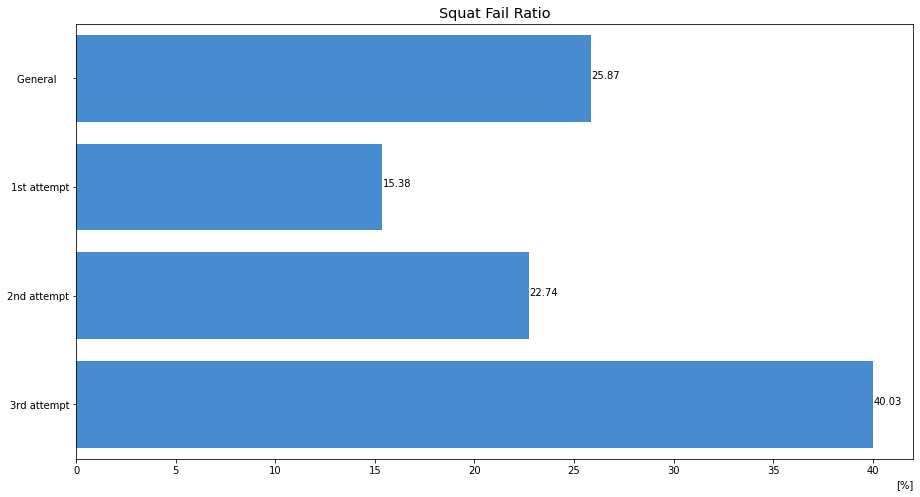

In [112]:
plot_fail_ratio('Squat')

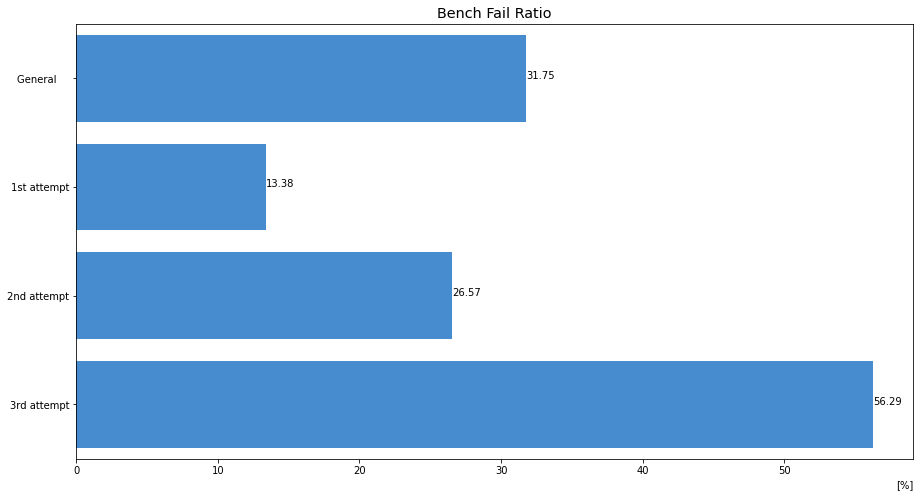

In [113]:
plot_fail_ratio('Bench')

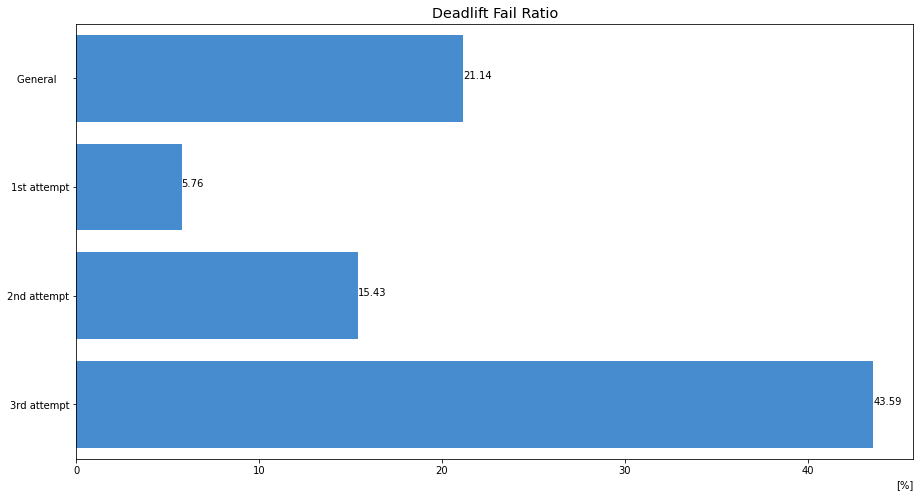

In [114]:
plot_fail_ratio('Deadlift')

In [115]:
# try to find dependence, like 3rd Bench failed then most probably 1st dl goes well etc

Let's see how many fails one, two or all three attempts

In [116]:
squats_df.shape[0]

291484

In [117]:
squats_df[(squats_df[squats[:-1]] < 0).any(axis=1)].shape[0]

161322

In [118]:
squats_df[squats_df[squats[0]] < 0].shape[0]

44736

In [119]:
squats_df[(squats_df[squats[:2]] < 0).all(axis=1)].shape[0]

15410

In [120]:
squats_df[(squats_df[squats[:3]] < 0).all(axis=1)].shape[0]

7400

In [121]:
squats_df[(squats_df[squats[0]] < 0) & ((squats_df[squats[1:3]] > 0).all(axis=1))].shape[0]

15404

In [122]:
testdf = squats_df[squats_df[squats[0]] < 0]

In [123]:
testdf.shape[0]

44736

In [124]:
def show_competitor_fail_ratio(lift_df, lifts):
    lift_name = lifts[0][:-3]
    atleast_one_failed, first_failed, second_failed, third_failed, two_failed, all_failed = get_competitor_fail_ratio(lift_df, lifts)
    print(f'The {atleast_one_failed}% competitors failed at least one attempt')
    print(f'The {first_failed}% competitors failed only first attempt')
    print(f'The {second_failed}% competitors failed only second attempt')
    print(f'The {third_failed}% competitors failed only third attempt')
    print(f'The {two_failed}% competitors failed two attempts')
    print(f'The {all_failed}% competitors failed all attempts')

In [125]:
def get_competitor_fail_ratio(lift_df, lifts):
    total = lift_df.shape[0]
    total_failed = lift_df[(lift_df[lifts[:-1]] < 0).any(axis=1)].shape[0]
    fa_failed = lift_df[(lift_df[lifts[0]] < 0) & ((lift_df[lifts[1:3]] > 0).all(axis=1))].shape[0]
    sa_failed = lift_df[(lift_df[lifts[0]] > 0) & (lift_df[lifts[1]] < 0) & (lift_df[lifts[2]] > 0)].shape[0]
    ta_failed = lift_df[(lift_df[lifts[2]] < 0) & ((lift_df[lifts[:2]] > 0).all(axis=1))].shape[0]
    two_a_failed = lift_df[(lift_df[lifts[:2]] < 0).all(axis=1)].shape[0]
    all_a_failed = lift_df[(lift_df[lifts[:3]] < 0).all(axis=1)].shape[0]
    atleast_one_failed = round(100*total_failed/total, 2)
    first_failed = round(100*fa_failed/total, 2)
    second_failed = round(100*sa_failed/total, 2)
    third_failed = round(100*ta_failed/total, 2)
    two_failed = round(100*two_a_failed/total, 2)
    all_failed = round(100*all_a_failed/total, 2)
    return atleast_one_failed, first_failed, second_failed, third_failed, two_failed, all_failed

In [126]:
show_competitor_fail_ratio(squats_df, squats)

The 55.35% competitors failed at least one attempt
The 5.28% competitors failed only first attempt
The 7.85% competitors failed only second attempt
The 22.84% competitors failed only third attempt
The 5.29% competitors failed two attempts
The 2.54% competitors failed all attempts


In [127]:
def plot_competitor_fail_ratio(lift_df, lifts): #find better name
    lift_name = lifts[0][:-3]
    atleast_one_failed, first_failed, second_failed, third_failed, two_failed, all_failed = get_competitor_fail_ratio(lift_df, lifts)
    plt.figure(figsize=(15, 8))
    plt.title(f'{lift_name} Competitors Fail Ratio', size='x-large')
    sns.barplot(x=[atleast_one_failed, first_failed, second_failed, third_failed, two_failed, all_failed],
               y=['at least one attempt', 'only first attempt', 'only second attempt', 
                  'only third attempt', 'two attempts', 'all attempts'], color='#318ce7')
    plt.xlabel('[%]', loc='right')
    addlabels([atleast_one_failed, first_failed, second_failed, third_failed, two_failed, all_failed])

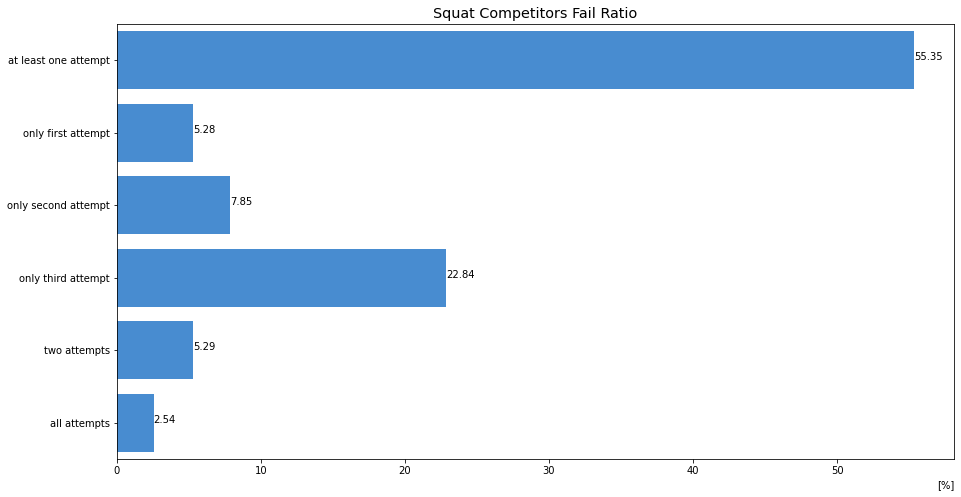

In [128]:
plot_competitor_fail_ratio(squats_df, squats)

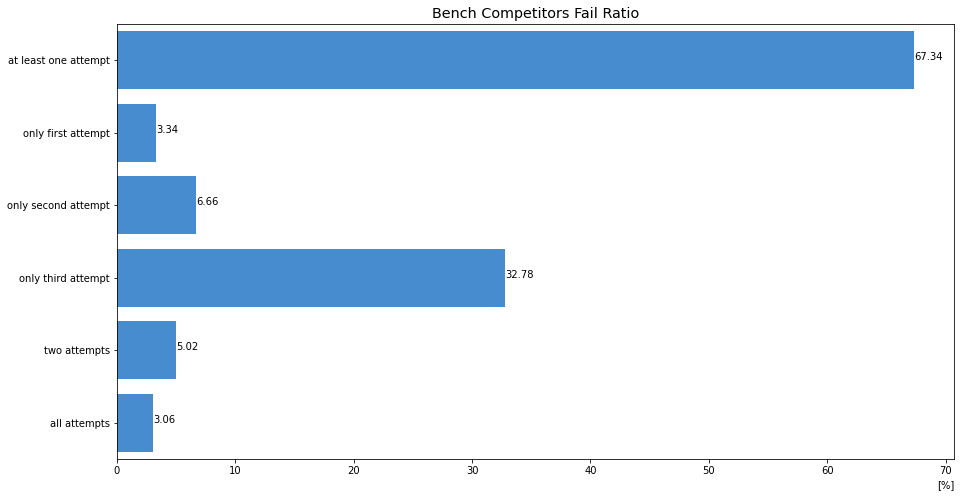

In [129]:
plot_competitor_fail_ratio(benchs_df, benchs)

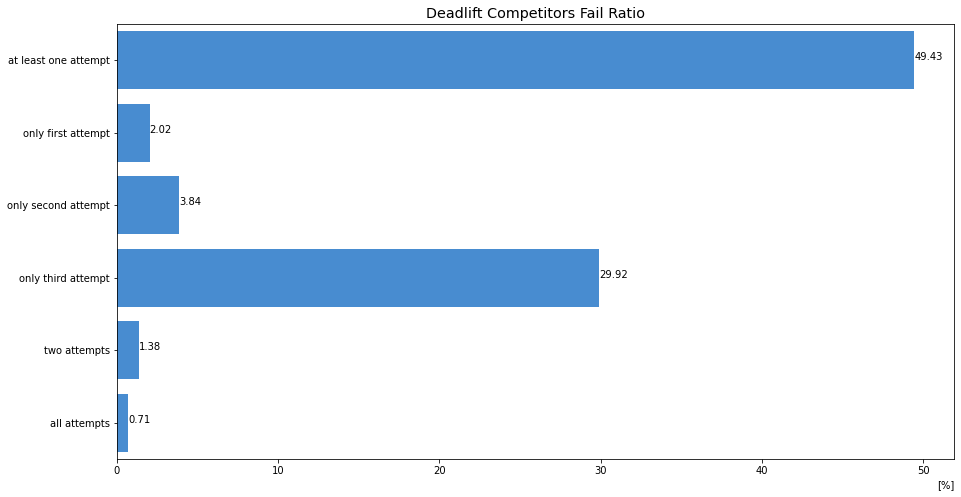

In [130]:
plot_competitor_fail_ratio(dlifts_df, dlifts)

In [131]:
squats_df[(squats_df[squats[:-1]] > 0).all(axis=1)].shape[0] #how many pass only: 1st, 2nd, 3rd; two and all 

120650

In [132]:
def show_competitor_pass_ratio(lift_df, lifts):
    lift_name = lifts[0][:-3]
    atleast_one_pass, first_pass, second_pass, third_pass, two_pass, all_pass = get_competitor_pass_ratio(lift_df, lifts)
    print(f'The {atleast_one_pass}% competitors pass at least one attempt')
    print(f'The {first_pass}% competitors pass only first attempt')
    print(f'The {second_pass}% competitors pass only second attempt')
    print(f'The {third_pass}% competitors pass only third attempt')
    print(f'The {two_pass}% competitors pass two attempts')
    print(f'The {all_pass}% competitors pass all attempts')

In [133]:
def get_competitor_pass_ratio(lift_df, lifts):
    total = lift_df.shape[0]
    total_pass = lift_df[(lift_df[lifts[:-1]] > 0).any(axis=1)].shape[0]
    fa_pass = lift_df[(lift_df[lifts[0]] > 0) & ((lift_df[lifts[1:3]] < 0).all(axis=1))].shape[0]
    sa_pass = lift_df[(lift_df[lifts[0]] < 0) & (lift_df[lifts[1]] > 0) & (lift_df[lifts[2]] < 0)].shape[0]
    ta_pass = lift_df[(lift_df[lifts[2]] > 0) & ((lift_df[lifts[:2]] < 0).all(axis=1))].shape[0]
    two_a_pass = lift_df[(lift_df[lifts[:2]] > 0).all(axis=1)].shape[0]
    all_a_pass = lift_df[(lift_df[lifts[:3]] > 0).all(axis=1)].shape[0]
    atleast_one_pass = round(100*total_pass/total, 2)
    first_pass = round(100*fa_pass/total, 2)
    second_pass = round(100*sa_pass/total, 2)
    third_pass = round(100*ta_pass/total, 2)
    two_pass = round(100*two_a_pass/total, 2)
    all_pass = round(100*all_a_pass/total, 2)
    return atleast_one_pass, first_pass, second_pass, third_pass, two_pass, all_pass

In [134]:
def plot_competitor_pass_ratio(lift_df, lifts): #find better name
    lift_name = lifts[0][:-3]
    atleast_one_pass, first_pass, second_pass, third_pass, two_pass, all_pass = get_competitor_pass_ratio(lift_df, lifts)
    plt.figure(figsize=(15, 8))
    plt.title(f'{lift_name} Competitors Success Ratio', size='x-large')
    sns.barplot(x=[atleast_one_pass, first_pass, second_pass, third_pass, two_pass, all_pass],
               y=['at least one attempt', 'only first attempt', 'only second attempt', 
                  'only third attempt', 'two attempts', 'all attempts'], color='#318ce7')
    plt.xlabel('[%]', loc='right')
    addlabels([atleast_one_pass, first_pass, second_pass, third_pass, two_pass, all_pass])

In [135]:
show_competitor_pass_ratio(squats_df, squats)

The 97.16% competitors pass at least one attempt
The 8.53% competitors pass only first attempt
The 4.33% competitors pass only second attempt
The 2.59% competitors pass only third attempt
The 66.14% competitors pass two attempts
The 41.39% competitors pass all attempts


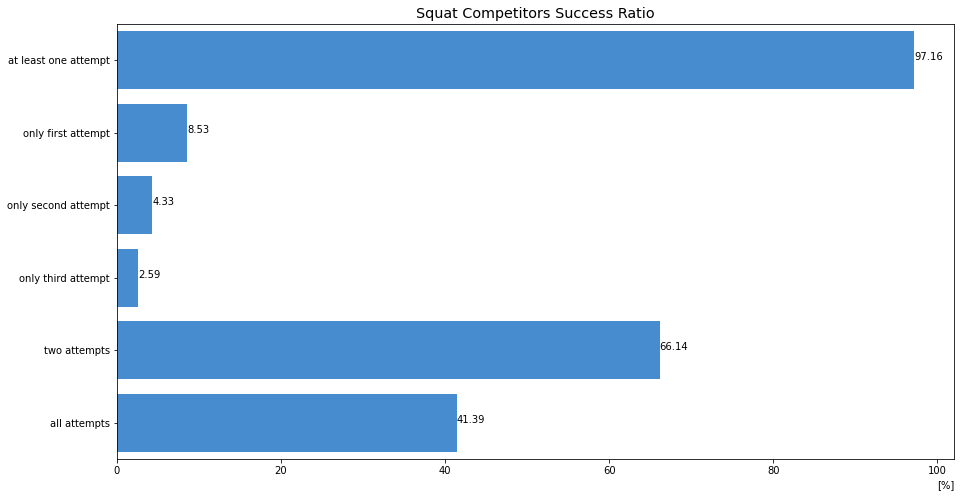

In [136]:
plot_competitor_pass_ratio(squats_df, squats)

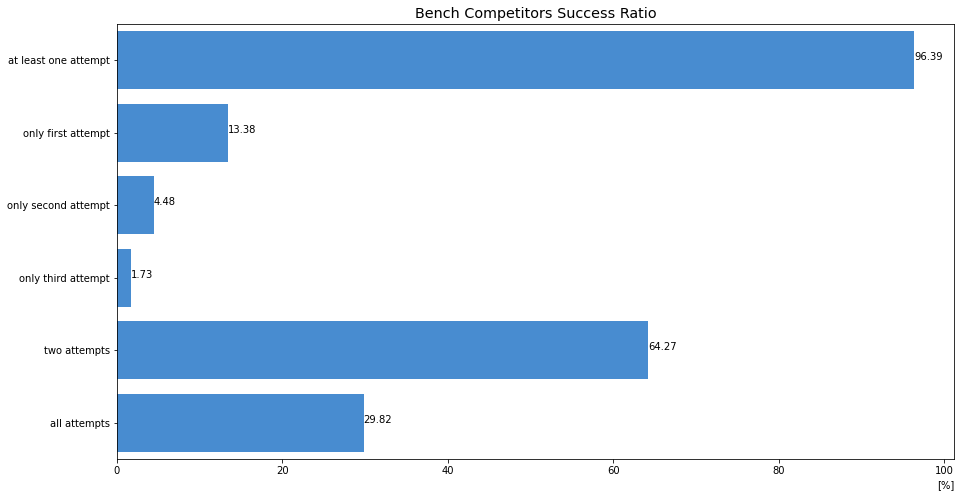

In [137]:
plot_competitor_pass_ratio(benchs_df, benchs)

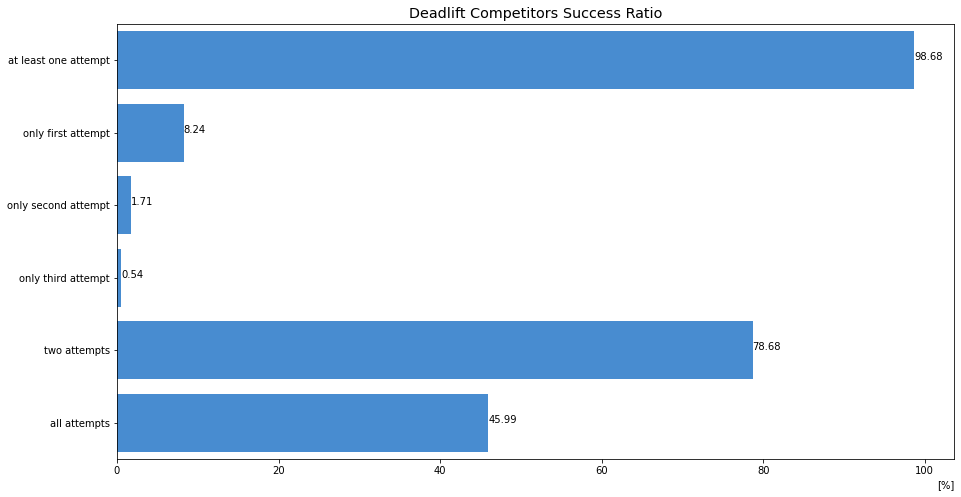

In [138]:
plot_competitor_pass_ratio(dlifts_df, dlifts)

In [139]:
age_class_grouped = df.groupby('AgeClass')

In [140]:
age_class_grouped

In [141]:
all_fails_gb = squats_df[(squats_df[squats[:-1]] < 0).any(axis=1)].groupby('AgeClass')[squats[:-1]].count().sum(axis=1)

In [142]:
first_fails_gb = squats_df[squats_df[squats[0]] < 0].groupby('AgeClass')[squats[0]].count()

In [143]:
two_fails_gb = squats_df[(squats_df[squats[:2]] < 0).all(axis=1)].groupby('AgeClass')[squats[0]].count()

In [144]:
three_fails_gb = squats_df[(squats_df[squats[:3]] < 0).all(axis=1)].groupby('AgeClass')[squats[0]].count()

In [145]:
def get_fail_attempts_for_ageclass(df, lifts):
    ageclass_failures = df[df[lifts] < 0]
    ageclass_failures['AgeClass'] = df['AgeClass']
    ageclass_failures = ageclass_failures.groupby('AgeClass').count()
    ageclass_attempts = df[df[lifts].notna()]
    ageclass_attempts['AgeClass'] = df['AgeClass']
    ageclass_attempts = ageclass_attempts.groupby('AgeClass').count()
    return ageclass_failures, ageclass_attempts

In [146]:
counted_failures = df[df[three_lifts] < 0]

In [147]:
counted_failures['AgeClass'] = df['AgeClass']

In [148]:
counted_failures = counted_failures.groupby('AgeClass').count()

In [149]:
counted_failures[three_lifts[:3]].sum(axis=1)

AgeClass
13-15      4224
16-17     14931
18-19     20883
20-23     49317
24-34     70856
35-39     15828
40-44     14704
45-49     10890
5-12        397
50-54      7878
55-59      4852
60-64      3241
65-69      1904
70-74      1105
75-79       498
80-999      134
dtype: int64

In [150]:
counted_attempts = df[df[three_lifts].notna()]

In [151]:
counted_attempts['AgeClass'] = df['AgeClass']

In [152]:
counted_attempts = counted_attempts.groupby('AgeClass').count()

In [153]:
counted_attempts

,Name,Sex,Event,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
AgeClass,,,,,,,,,,,,,,,,,,,,,
13-15,0,0,0,0,0,0,0,0,6200,6161,...,0,0,0,0,0,0,0,0,0,0
16-17,0,0,0,0,0,0,0,0,19412,19205,...,0,0,0,0,0,0,0,0,0,0
18-19,0,0,0,0,0,0,0,0,25816,25527,...,0,0,0,0,0,0,0,0,0,0
20-23,0,0,0,0,0,0,0,0,64738,64176,...,0,0,0,0,0,0,0,0,0,0
24-34,0,0,0,0,0,0,0,0,93254,92319,...,0,0,0,0,0,0,0,0,0,0
35-39,0,0,0,0,0,0,0,0,20144,19825,...,0,0,0,0,0,0,0,0,0,0
40-44,0,0,0,0,0,0,0,0,19326,18950,...,0,0,0,0,0,0,0,0,0,0
45-49,0,0,0,0,0,0,0,0,14686,14402,...,0,0,0,0,0,0,0,0,0,0
5-12,0,0,0,0,0,0,0,0,762,761,...,0,0,0,0,0,0,0,0,0,0


In [154]:
counted_failures[three_lifts]/counted_attempts[three_lifts]

,Squat1Kg,Squat2Kg,Squat3Kg,Bench1Kg,Bench2Kg,Bench3Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg
AgeClass,,,,,,,,,
13-15,0.145645,0.200130,0.343365,0.099561,0.221902,0.541756,0.050751,0.114016,0.327563
16-17,0.160622,0.227285,0.394178,0.118398,0.238376,0.548363,0.060386,0.146208,0.391912
18-19,0.166292,0.240530,0.417883,0.128783,0.250908,0.547500,0.068058,0.165211,0.447520
20-23,0.144490,0.220503,0.410738,0.130650,0.256233,0.550484,0.064382,0.166128,0.449633
24-34,0.147254,0.221655,0.407834,0.138508,0.271690,0.574185,0.060036,0.161754,0.453120
35-39,0.163870,0.238487,0.408090,0.150237,0.291367,0.582607,0.055024,0.159485,0.456738
40-44,0.158853,0.237836,0.392175,0.142266,0.280349,0.579064,0.049526,0.148867,0.439699
45-49,0.158178,0.232676,0.380563,0.134598,0.279542,0.572995,0.041409,0.131331,0.417015
5-12,0.115486,0.157687,0.249012,0.085123,0.215891,0.518822,0.033207,0.066155,0.225681


In [155]:
ageclass_failures, ageclass_attempts = get_fail_attempts_for_ageclass(df, three_lifts)

In [156]:
ageclass_failures

,Name,Sex,Event,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
AgeClass,,,,,,,,,,,,,,,,,,,,,
13-15,0,0,0,0,0,0,0,0,903,1233,...,0,0,0,0,0,0,0,0,0,0
16-17,0,0,0,0,0,0,0,0,3118,4365,...,0,0,0,0,0,0,0,0,0,0
18-19,0,0,0,0,0,0,0,0,4293,6140,...,0,0,0,0,0,0,0,0,0,0
20-23,0,0,0,0,0,0,0,0,9354,14151,...,0,0,0,0,0,0,0,0,0,0
24-34,0,0,0,0,0,0,0,0,13732,20463,...,0,0,0,0,0,0,0,0,0,0
35-39,0,0,0,0,0,0,0,0,3301,4728,...,0,0,0,0,0,0,0,0,0,0
40-44,0,0,0,0,0,0,0,0,3070,4507,...,0,0,0,0,0,0,0,0,0,0
45-49,0,0,0,0,0,0,0,0,2323,3351,...,0,0,0,0,0,0,0,0,0,0
5-12,0,0,0,0,0,0,0,0,88,120,...,0,0,0,0,0,0,0,0,0,0


In [157]:
ageclass_attempts

,Name,Sex,Event,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
AgeClass,,,,,,,,,,,,,,,,,,,,,
13-15,0,0,0,0,0,0,0,0,6200,6161,...,0,0,0,0,0,0,0,0,0,0
16-17,0,0,0,0,0,0,0,0,19412,19205,...,0,0,0,0,0,0,0,0,0,0
18-19,0,0,0,0,0,0,0,0,25816,25527,...,0,0,0,0,0,0,0,0,0,0
20-23,0,0,0,0,0,0,0,0,64738,64176,...,0,0,0,0,0,0,0,0,0,0
24-34,0,0,0,0,0,0,0,0,93254,92319,...,0,0,0,0,0,0,0,0,0,0
35-39,0,0,0,0,0,0,0,0,20144,19825,...,0,0,0,0,0,0,0,0,0,0
40-44,0,0,0,0,0,0,0,0,19326,18950,...,0,0,0,0,0,0,0,0,0,0
45-49,0,0,0,0,0,0,0,0,14686,14402,...,0,0,0,0,0,0,0,0,0,0
5-12,0,0,0,0,0,0,0,0,762,761,...,0,0,0,0,0,0,0,0,0,0


In [158]:
def get_failure_stats_for_ageclass(counted_failures, counted_attempts, lifts):
    lift_name = lifts[0][:-3]
    df_stats = 100*counted_failures[lifts]/counted_attempts[lifts]
    df_stats = df_stats.apply(lambda x: round(x, 2))
    temp = df_stats.drop('5-12')
    df_stats = pd.concat([df_stats.loc['5-12'].to_frame().T, temp])
    return df_stats

In [159]:
fail_ageclass_df = get_failure_stats_for_ageclass(ageclass_failures, ageclass_attempts, three_lifts)

In [160]:
fail_ageclass_df

,Squat1Kg,Squat2Kg,Squat3Kg,Bench1Kg,Bench2Kg,Bench3Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg
5-12,11.55,15.77,24.90,8.51,21.59,51.88,3.32,6.62,22.57
13-15,14.56,20.01,34.34,9.96,22.19,54.18,5.08,11.40,32.76
16-17,16.06,22.73,39.42,11.84,23.84,54.84,6.04,14.62,39.19
18-19,16.63,24.05,41.79,12.88,25.09,54.75,6.81,16.52,44.75
20-23,14.45,22.05,41.07,13.06,25.62,55.05,6.44,16.61,44.96
24-34,14.73,22.17,40.78,13.85,27.17,57.42,6.00,16.18,45.31
35-39,16.39,23.85,40.81,15.02,29.14,58.26,5.50,15.95,45.67
40-44,15.89,23.78,39.22,14.23,28.03,57.91,4.95,14.89,43.97
45-49,15.82,23.27,38.06,13.46,27.95,57.30,4.14,13.13,41.70
50-54,16.39,24.00,37.51,12.50,26.83,55.95,3.96,13.08,42.22


In [162]:
def show_ageclass_lift_fail_ratio(df, lift):
    lift_name = lift[:-2]
    plt.figure(figsize=(15, 8))
    plt.title(f'{lift_name} Fail Ratio per Age Class', size='x-large')
    sns.barplot(x=df[lift], y=df.index, color='#318ce7')
    plt.xlabel('[%]', loc='right', rotation=0)
    plt.ylabel('Age Class')
    addlabels(df[lift])

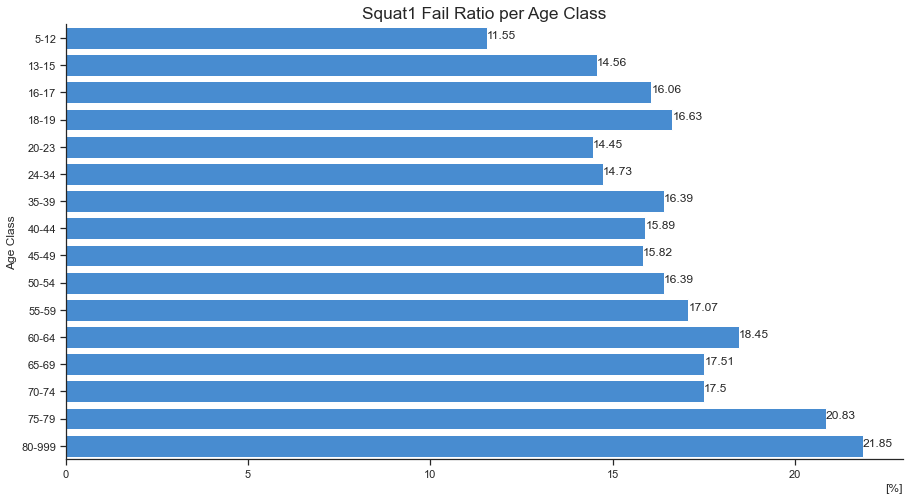

In [163]:
show_ageclass_lift_fail_ratio(fail_ageclass_df, squats[0]) # squats, benchs, dlifts

In [164]:
def get_competitor_ageclass_fail_ratio(lift_df, lifts):
    ''' To simplify the name is used becasue for every competitor we have name in database '''
    total = lift_df.groupby('AgeClass').count()['Name']
    total_failed = lift_df[(lift_df[lifts[:-1]] < 0).any(axis=1)].groupby('AgeClass').count()['Name']
    fa_failed = lift_df[(lift_df[lifts[0]] < 0) & ((lift_df[lifts[1:3]] > 0).all(axis=1))].groupby('AgeClass').count()['Name']
    sa_failed = lift_df[(lift_df[lifts[0]] > 0) & (lift_df[lifts[1]] < 0) & (lift_df[lifts[2]] > 0)].groupby('AgeClass').count()['Name']
    ta_failed = lift_df[(lift_df[lifts[2]] < 0) & ((lift_df[lifts[:2]] > 0).all(axis=1))].groupby('AgeClass').count()['Name']
    two_a_failed = lift_df[(lift_df[lifts[:2]] < 0).all(axis=1)].groupby('AgeClass').count()['Name']
    all_a_failed = lift_df[(lift_df[lifts[:3]] < 0).all(axis=1)].groupby('AgeClass').count()['Name']
    atleast_one_failed = round(100*total_failed/total, 2)
    first_failed = round(100*fa_failed/total, 2)
    second_failed = round(100*sa_failed/total, 2)
    third_failed = round(100*ta_failed/total, 2)
    two_failed = round(100*two_a_failed/total, 2)
    all_failed = round(100*all_a_failed/total, 2)
    return atleast_one_failed, first_failed, second_failed, third_failed, two_failed, all_failed

In [165]:
def show_competitor_ageclass_fail_ratio(lift_df, lifts):
    lift_name = lifts[0][:-3]
    atleast_one_failed, first_failed, second_failed, third_failed, two_failed, all_failed = get_competitor_ageclass_fail_ratio(lift_df, lifts)
    print(f'The competitors failed at least one attempt [%]: {atleast_one_failed}')
    print(f'The competitors failed only first attempt [%]: {first_failed}')
    print(f'The competitors failed only second attempt [%]: {second_failed}')
    print(f'The competitors failed only third attempt [%]: {third_failed}')
    print(f'The competitors failed two attempts [%]: {two_failed}')
    print(f'The competitors failed all attempts [%]: {all_failed}')

In [174]:
def plot_competitor_ageclass_fail_ratio(lift_df, lifts): #find better name
    lift_name = lifts[0][:-3]
    atleast_one_failed, first_failed, second_failed, third_failed, two_failed, all_failed = get_competitor_ageclass_fail_ratio(lift_df, lifts)
    columns=['at least one attempt', 'only first attempt', 'only second attempt',
                               'only third attempt', 'two attempts', 'all attempts']
    df = pd.DataFrame(np.transpose([atleast_one_failed.values, first_failed.values, second_failed.values, third_failed.values, two_failed.values, all_failed.values]), 
                      columns=columns, index=atleast_one_failed.index)
    temp = df.drop('5-12')
    df = pd.concat([df.loc['5-12'].to_frame().T, temp])
    
    def addlabels(ax, y):
        for index, value in enumerate(y):
            label = str(value)
            ax.text(value, index, label, ha='left')
    
    fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(15, 32), constrained_layout=True)
    for i, c in enumerate(columns):
        sns.barplot(ax=axs.flat[i], x=df[c], y=df.index, color='#318ce7')
        axs.flat[i].set_title(f'{lift_name} Competitors Fail Ratio for "{c}"', size='x-large')
        axs.flat[i].set_ylabel('Age Class', loc='top')
        axs.flat[i].set_xlabel('[%]', loc='right')
        addlabels(axs.flat[i], df[c])

In [175]:
show_competitor_ageclass_fail_ratio(squats_df, squats)

The competitors failed at least one attempt [%]: AgeClass
13-15     51.40
16-17     56.08
18-19     58.07
20-23     55.72
24-34     55.31
35-39     56.13
40-44     54.80
45-49     53.87
5-12      38.25
50-54     53.80
55-59     53.39
60-64     53.30
65-69     51.91
70-74     51.89
75-79     56.76
80-999    56.95
Name: Name, dtype: float64
The competitors failed only first attempt [%]: AgeClass
13-15     6.44
16-17     5.84
18-19     5.85
20-23     4.97
24-34     4.93
35-39     5.07
40-44     5.58
45-49     5.45
5-12      4.18
50-54     5.48
55-59     5.94
60-64     6.69
65-69     6.31
70-74     6.01
75-79     7.95
80-999    5.30
Name: Name, dtype: float64
The competitors failed only second attempt [%]: AgeClass
13-15      8.45
16-17      8.37
18-19      8.07
20-23      7.57
24-34      7.42
35-39      7.84
40-44      8.08
45-49      8.27
5-12       7.31
50-54      8.80
55-59      8.84
60-64      8.75
65-69      9.08
70-74     10.04
75-79     11.45
80-999     7.95
Name: Name, dtype: floa

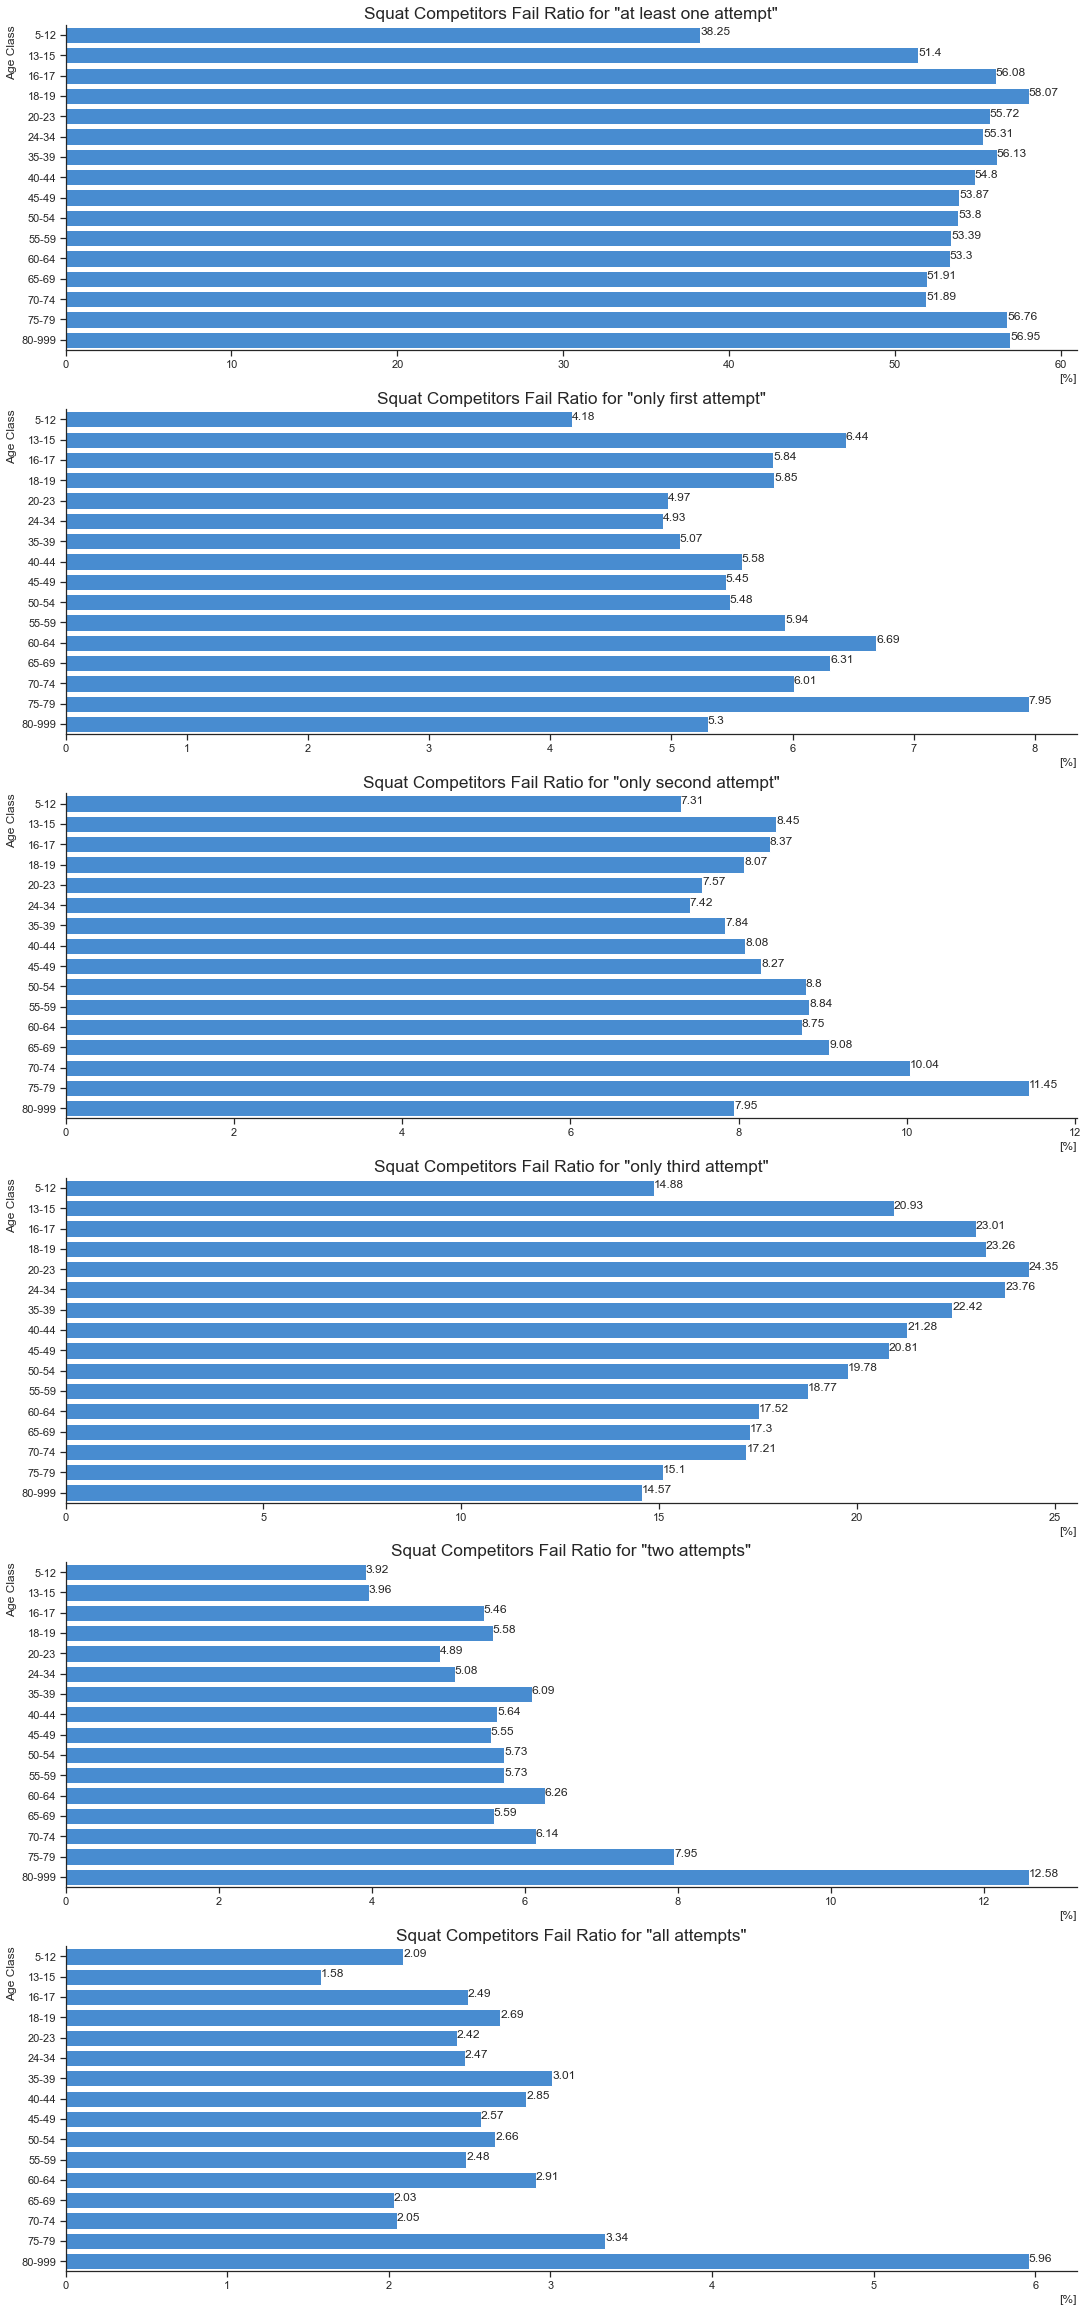

In [176]:
plot_competitor_ageclass_fail_ratio(squats_df, squats)

Chcek some stats for additional_f = ['Sex', 'Event', 'Equipment','Division']. The last one contain too many unique values so let's ignore it. As an example the 'Sex' will be shown. That can be done by editing (updating) already used functions.
The get_failure_stats_for_ageclass, get_fail_attempts_for_ageclass and show_ageclass_lift_fail_ratio will be modified (v2).

In [265]:
def get_failure_stats_for_ageclass_v2(counted_failures, counted_attempts, lifts, split=None):
    ''' For the split at the moment only "Sex" and None can be used '''
    lift_name = lifts[0][:-3]
    df_stats = 100*counted_failures[lifts]/counted_attempts[lifts]
    df_stats = df_stats.apply(lambda x: round(x, 2))
    if not split:
        temp = df_stats.drop('5-12')
        df_stats = pd.concat([df_stats.loc['5-12'].to_frame().T, temp])
    elif split == 'Sex':
        temp = df_stats.drop('5-12')
        df_stats = pd.concat([df_stats.loc[[('5-12', 'F'), ('5-12', 'M')]], temp])
    else:
        return 'Ups, wrong split string'
    return df_stats

In [266]:
def get_fail_attempts_for_ageclass_v2(df, lifts, split=None):
    ''' For the split at the moment only "Sex" and None can be used '''
    add_cols = [*additional_f[:-1], 'AgeClass']
    ageclass_failures = df[df[lifts] < 0]
    ageclass_failures[add_cols] = df[add_cols]
    ageclass_attempts = df[df[lifts].notna()]
    ageclass_attempts[add_cols] = df[add_cols]
    if not split:
        ageclass_failures = ageclass_failures.groupby('AgeClass').count()
        ageclass_attempts = ageclass_attempts.groupby('AgeClass').count()
    elif split == 'Sex':
        ageclass_failures = ageclass_failures.groupby(['AgeClass', 'Sex']).count()
        ageclass_attempts = ageclass_attempts.groupby(['AgeClass', 'Sex']).count()
    else:
        return 'Ups, wrong split string'
    return ageclass_failures, ageclass_attempts

In [267]:
ageclass_failures2, ageclass_attempts2 = get_fail_attempts_for_ageclass_v2(df, three_lifts, split='Sex')

In [268]:
fail_ageclass_df2 = get_failure_stats_for_ageclass_v2(ageclass_failures2, ageclass_attempts2, three_lifts, split='Sex')

In [269]:
fail_ageclass_df2

Squat1Kg  Squat2Kg  Squat3Kg  Bench1Kg  Bench2Kg  Bench3Kg  \
AgeClass Sex                                                               
5-12     F        9.70     13.30     23.68      7.19     15.00     46.07   
         M       13.22     18.00     26.00      9.39     26.01     55.69   
13-15    F       14.79     22.28     35.29      8.77     22.81     54.46   
         M       14.41     18.47     33.68     10.60     21.85     54.02   
16-17    F       14.88     23.29     40.67      9.58     24.35     56.13   
         M       16.58     22.48     38.86     12.71     23.64     54.34   
18-19    F       15.81     24.93     41.16     10.52     25.48     55.83   
         M       16.93     23.73     42.02     13.67     24.96     54.38   
20-23    F       12.95     21.65     41.49     10.09     25.20     56.04   
         M       15.01     22.20     40.92     14.07     25.77     54.71   
24-34    F       13.52     20.86     40.39     10.20     24.82     57.50   
         M       15.26     22.75     40.96     15.20     28.05     57.39   
35-39    F       14.47     21.82     39.24     10.34     25.23     56.57   
         M       17.38     24.92     41.66     16.79     30.63     58.92   
40-44    F       15.31     22.79     37.38      9.81     24.48     57.76   
         M       16.18     24.29     40.20     15.81     29.33     57.96   
45-49    F       15.77     23.46     37.58      9.46     25.49     57.78   
         M       15.84     23.18     38.29     14.89     28.85     57.12   
50-54    F       16.21     24.68     37.63      8.23     24.20     56.09   
         M       16.46     23.71     37.45     13.87     27.69     55.90   
55-59    F       16.58     24.12     33.90      9.27     24.92     56.40   
         M       17.22     23.63     36.81     14.17     28.13     55.70   
60-64    F       17.85     21.74     33.95      7.95     23.90     55.82   
         M       18.61     25.18     36.07     14.02     26.49     52.48   
65-69    F       17.66     21.83     34.47      8.01     18.95     56.67   
         M       17.48     23.77     34.66     13.26     25.13     50.47   
70-74    F       11.24     22.60     37.21      8.31     23.20     55.73   
         M       18.31     24.34     32.45     12.66     23.12     51.05   
75-79    F       19.40     29.85     31.82     17.99     20.29     58.70   
         M       21.00     29.98     33.07     12.04     25.25     51.91   
80-999   F       57.14     53.85     63.64     19.57     39.13     51.11   
         M       18.25     32.33     35.20     10.57     22.68     43.88   

              Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  
AgeClass Sex                                         
5-12     F           3.16         7.37        18.03  
         M           3.45         5.99        26.33  
13-15    F           4.42        12.69        35.90  
         M           5.49        10.58        30.72  
16-17    F           4.72        14.28        39.67  
         M           6.60        14.77        38.98  
18-19    F           5.37        15.12        41.73  
         M           7.32        17.03        45.86  
20-23    F           4.36        13.07        39.16  
         M           7.20        17.92        47.15  
24-34    F           4.05        12.17        37.68  
         M           6.85        17.93        48.76  
35-39    F           3.58        11.69        37.08  
         M           6.49        18.17        50.39  
40-44    F           3.38        11.18        36.93  
         M           5.74        16.78        47.80  
45-49    F           3.16         9.45        35.92  
         M           4.60        14.91        44.70  
50-54    F           3.13        10.34        37.52  
         M           4.30        14.23        44.35  
55-59    F           2.56        10.21        35.63  
         M           4.13        13.19        41.17  
60-64    F           3.08         9.32        31.17  
         M           4.69        12.50        37.92  
65-69    F           2.71

In [287]:
def show_ageclass_lift_fail_ratio_v2(df, lift, split=None):
    lift_name = lift[:-2]
    plt.figure(figsize=(15, 8))
    if not split:
        plt.title(f'{lift_name} Fail Ratio per Age Class', size='x-large')
        ax = sns.barplot(x=df[lift], y=df.index, color='#318ce7')
        ax.bar_label(ax.containers[0]) # New in matplotlib 3.4.0
    elif split == 'Sex':
        df_r = df.reset_index()
        plt.title(f'{lift_name} Fail Ratio per Age Class per Sex', size='x-large')
        ax = sns.barplot(x=df_r[lift], y=df_r['AgeClass'], hue=df_r['Sex'], palette={'F': '#9099A2', 'M': '#318ce7'})
        for c in ax.containers: # New in matplotlib 3.4.0
            ax.bar_label(c)
    plt.xlabel('[%]', loc='right', rotation=0)
    plt.ylabel('Age Class')

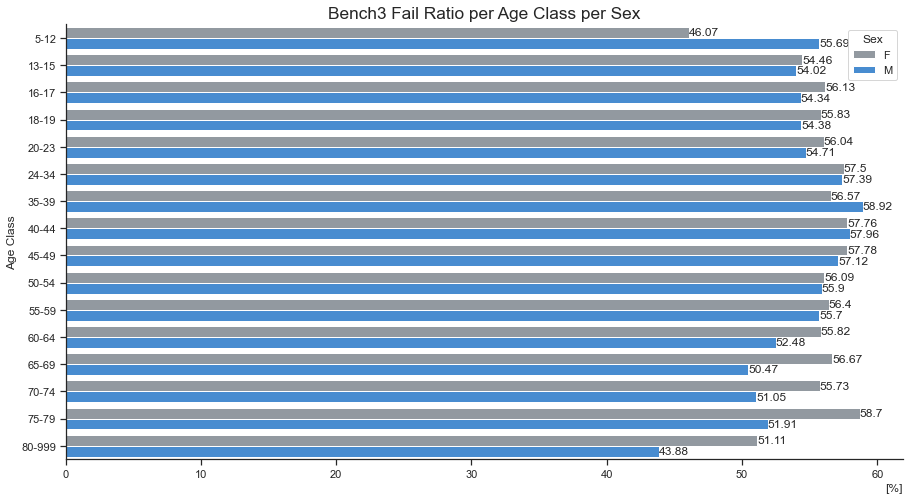

In [288]:
show_ageclass_lift_fail_ratio_v2(fail_ageclass_df2, benchs[2], split='Sex') # squats, benchs, dlifts

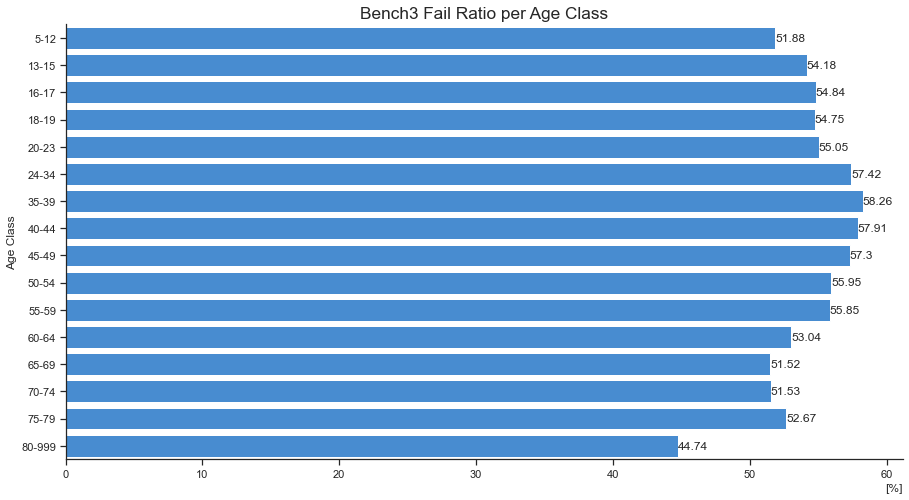

In [289]:
show_ageclass_lift_fail_ratio_v2(fail_ageclass_df, benchs[2])